In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import xgboost
sns.set()
%matplotlib inline

In [82]:
!ls -lrt

total 156460
-rw-rw-r-- 1 subhash subhash       790 Jul 24  2015 BasicFunctions.py
-rw-rw-r-- 1 subhash subhash      1738 Aug  4  2015 Metadata.csv
-rw-rw-r-- 1 subhash subhash      2045 Aug 17  2015 Instructions.txt
-rw-rw-r-- 1 subhash subhash  17283347 Aug 21  2015 Holdout for Testing.csv
-rw-rw-r-- 1 subhash subhash 115872562 Aug 21  2015 Data for Cleaning & Modeling.csv
-rw-rw-r-- 1 subhash subhash  18245814 Mar 16 00:25 State Farm Data Science WORK SAMPLE.zipx
drwxrwxr-x 2 subhash subhash      4096 Mar 20 02:25 out
-rw-rw-r-- 1 subhash subhash   1720679 Mar 20 03:05 InterestRatePrediction-Analysis.pdf
-rw-rw-r-- 1 subhash subhash   2708507 Mar 20 05:22 InterestRatePrediction-Analysis.odt
-rw-rw-r-- 1 subhash subhash     14367 Mar 20 09:56 InterestRatePrediction.py
-rw-rw-r-- 1 subhash subhash   4329738 Mar 20 10:14 InterestRatePrediction.ipynb


In [83]:
!head Data\ for\ Cleaning\ \&\ Modeling.csv

In [84]:
# theres a lot of text in the data... hmmm..
# lets look at the metadata
!cat Metadata.csv

In [85]:
# Read data in
df = pd.read_csv("Data for Cleaning & Modeling.csv")

/home/subhash/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [86]:
# did we read everything in
!wc -l Data\ for\ Cleaning\ \&\ Modeling.csv

400001 Data for Cleaning & Modeling.csv


In [87]:
df.head()

X1       X2        X3       X4       X5       X6          X7 X8  X9  \
0  11.89%  54734.0   80364.0  $25,000  $25,000  $19,080   36 months  B  B4   
1  10.71%  55742.0  114426.0   $7,000   $7,000     $673   36 months  B  B5   
2  16.99%  57167.0  137225.0  $25,000  $25,000  $24,725   36 months  D  D3   
3  13.11%  57245.0  138150.0   $1,200   $1,200   $1,200   36 months  C  C2   
4  13.57%  57416.0  139635.0  $10,800  $10,800  $10,692   36 months  C  C3   

                      X10 ...     X23  X24   X25 X26   X27  X28      X29  \
0                     NaN ...  Feb-94  0.0   NaN NaN  10.0  0.0  28854.0   
1                     CNN ...  Oct-00  0.0   NaN NaN   7.0  0.0  33623.0   
2          Web Programmer ...  Jun-00  0.0  41.0 NaN  10.0  0.0  19878.0   
3  city of beaumont texas ...  Jan-85  0.0  64.0 NaN   5.0  0.0   2584.0   
4    State Farm Insurance ...  Dec-96  1.0  58.0 NaN  14.0  0.0   3511.0   

      X30   X31 X32  
0  52.10%  42.0   f  
1  76.70%   7.0   f  
2  66.30%  17.0   f  
3  40.40%  31.0   f  
4  25.60%  40.0   f  

[5 rows x 32 columns]

In [88]:
# lets assign some meaningful names to the columns to make the analysis and references easier
column_mapping = {
    'X1': 'interest_rate',
    'X2': 'loan_id',
    'X3': 'borrower_id',
    'X4': 'request_amt',
    'X5': 'funded_amt',
    'X6': 'investor_funded_amt',
    'X7': 'num_instalments',
    'X8': 'loan_grade',
    'X9': 'loan_subgrade',
    'X10': 'emp_or_jobtitle',
    'X11': 'years_employed', #Number of years employed (0 to 10; 10 = 10 or more)
    'X12': 'home_ownership', #"Home ownership status: RENT, OWN, MORTGAGE, OTHER."
    'X13': 'annual_income',
    'X14': 'income_verification_status',
    'X15': 'loan_issue_date',
    'X16': 'loan_reason',
    'X17': 'loan_category',
    'X18': 'loan_title',
    'X19': 'zip_code',
    'X20': 'state',
    'X21': 'debt_income_ratio',
    'X22': 'num_delinqs',
    'X23': 'earliest_credit_line',
    'X24': 'num_credit_inquiries',
    'X25': 'months_since_last_delinq',
    'X26': 'months_since_last_rec',
    'X27': 'open_credit_lines',
    'X28': 'num_derog_pub_recs',
    'X29': 'revolving_bal',
    'X30': 'revolving_line_util',
    'X31': 'tot_credit_lines',
    'X32': 'initial_list_status'}

df = df.rename(columns=column_mapping)

In [89]:
# lets look at the data now
df.head()

interest_rate  loan_id  borrower_id request_amt funded_amt  \
0        11.89%  54734.0      80364.0     $25,000    $25,000   
1        10.71%  55742.0     114426.0      $7,000     $7,000   
2        16.99%  57167.0     137225.0     $25,000    $25,000   
3        13.11%  57245.0     138150.0      $1,200     $1,200   
4        13.57%  57416.0     139635.0     $10,800    $10,800   

  investor_funded_amt num_instalments loan_grade loan_subgrade  \
0             $19,080       36 months          B            B4   
1                $673       36 months          B            B5   
2             $24,725       36 months          D            D3   
3              $1,200       36 months          C            C2   
4             $10,692       36 months          C            C3   

          emp_or_jobtitle         ...         earliest_credit_line  \
0                     NaN         ...                       Feb-94   
1                     CNN         ...                       Oct-00   
2          Web Programmer         ...                       Jun-00   
3  city of beaumont texas         ...                       Jan-85   
4    State Farm Insurance         ...                       Dec-96   

  num_credit_inquiries  months_since_last_delinq months_since_last_rec  \
0                  0.0                       NaN                   NaN   
1                  0.0                       NaN                   NaN   
2                  0.0                      41.0                   NaN   
3                  0.0                      64.0                   NaN   
4                  1.0                      58.0                   NaN   

  open_credit_lines num_derog_pub_recs revolving_bal revolving_line_util  \
0              10.0                0.0       28854.0              52.10%   
1               7.0                0.0       33623.0              76.70%   
2              10.0                0.0       19878.0              66.30%   
3               5.0                0.0        2584.0              40.40%   
4              14.0                0.0        3511.0              25.60%   

  tot_credit_lines initial_list_status  
0             42.0                   f  
1              7.0                   f  
2             17.0                   f  
3             31.0                   f  
4             40.0                   f  

[5 rows x 32 columns]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
interest_rate                 338990 non-null object
loan_id                       399999 non-null float64
borrower_id                   399999 non-null float64
request_amt                   399999 non-null object
funded_amt                    399999 non-null object
investor_funded_amt           399999 non-null object
num_instalments               399999 non-null object
loan_grade                    338730 non-null object
loan_subgrade                 338730 non-null object
emp_or_jobtitle               376018 non-null object
years_employed                399999 non-null object
home_ownership                338639 non-null object
annual_income                 338972 non-null float64
income_verification_status    399999 non-null object
loan_issue_date               399999 non-null object
loan_reason                   123561 non-null object
loan_category                 399999 n

In [91]:
# there seems to be one record which has everything null..lets remove that..
df.drop(df[df['loan_id'].isnull()].index, axis=0, inplace=True)

# There are many records for which interest rate is Null. 
# As interest_rate is our target variable and we are learning a function approximator to predict that,
# it does not make sense to have any records that are null..
# Lets investigate what these records are anyways..

df.drop(df[df['interest_rate'].isnull()].index, axis=0, inplace=True)

# lets reset the index
df = df.reset_index(drop=True)

In [92]:
# lets look at one of the records
df.loc[0,:]

interest_rate                                                            11.89%
loan_id                                                                   54734
borrower_id                                                               80364
request_amt                                                             $25,000
funded_amt                                                              $25,000
investor_funded_amt                                                     $19,080
num_instalments                                                       36 months
loan_grade                                                                    B
loan_subgrade                                                                B4
emp_or_jobtitle                                                             NaN
years_employed                                                         < 1 year
home_ownership                                                             RENT
annual_income                           

In [93]:
#df[['interest_rate','request_amt', 'funded_amt', 'investor_funded_amt', 'revolving_line_util']].head()

In [94]:
# looks like some cleanup is in order
# % symbols in the percentages, $ symbols, "months" in the num_instalments

# numeric_columns
numeric_cols = ['interest_rate', 'request_amt', 'funded_amt', 'investor_funded_amt',
                'revolving_line_util','num_instalments']
df[numeric_cols] = df[numeric_cols].replace({'\$':'', ',':'', '\%':'','months':'', ' ':''}, regex=True)\
                    .astype(float)

In [95]:
df[['request_amt', 'funded_amt', 'investor_funded_amt']].describe()

request_amt     funded_amt  investor_funded_amt
count  338989.000000  338989.000000        338989.000000
mean    14276.968353   14248.306140         14182.000445
std      8252.264104    8238.064335          8255.138412
min       500.000000     500.000000             0.000000
25%      8000.000000    8000.000000          8000.000000
50%     12000.000000   12000.000000         12000.000000
75%     20000.000000   20000.000000         19900.000000
max     35000.000000   35000.000000         35000.000000

In [96]:
from IPython.display import display
size = 9
start_col = 0
while start_col < len(df.columns):
    cols = df.columns[start_col:min(len(df.columns),start_col+size)]
    print(df[cols].dtypes)
    display(df[cols].head())
    start_col += size

interest_rate          float64
loan_id                float64
borrower_id            float64
request_amt            float64
funded_amt             float64
investor_funded_amt    float64
num_instalments        float64
loan_grade              object
loan_subgrade           object
dtype: object


interest_rate  loan_id  borrower_id  request_amt  funded_amt  \
0          11.89  54734.0      80364.0      25000.0     25000.0   
1          10.71  55742.0     114426.0       7000.0      7000.0   
2          16.99  57167.0     137225.0      25000.0     25000.0   
3          13.11  57245.0     138150.0       1200.0      1200.0   
4          13.57  57416.0     139635.0      10800.0     10800.0   

   investor_funded_amt  num_instalments loan_grade loan_subgrade  
0              19080.0             36.0          B            B4  
1                673.0             36.0          B            B5  
2              24725.0             36.0          D            D3  
3               1200.0             36.0          C            C2  
4              10692.0             36.0          C            C3

emp_or_jobtitle                object
years_employed                 object
home_ownership                 object
annual_income                 float64
income_verification_status     object
loan_issue_date                object
loan_reason                    object
loan_category                  object
loan_title                     object
dtype: object


emp_or_jobtitle years_employed home_ownership  annual_income  \
0                     NaN       < 1 year           RENT        85000.0   
1                     CNN       < 1 year           RENT        65000.0   
2          Web Programmer         1 year           RENT        70000.0   
3  city of beaumont texas      10+ years            OWN        54000.0   
4    State Farm Insurance        6 years           RENT        32000.0   

  income_verification_status loan_issue_date  \
0          VERIFIED - income          Aug-09   
1               not verified          May-08   
2          VERIFIED - income          Aug-14   
3               not verified          Mar-10   
4               not verified          Nov-09   

                                         loan_reason       loan_category  \
0  Due to a lack of personal finance education an...  debt_consolidation   
1  Just want to pay off the last bit of credit ca...         credit_card   
2  Trying to pay a friend back for apartment brok...  debt_consolidation   
3  If funded, I would use this loan consolidate t...  debt_consolidation   
4  I currently have a personal loan with Citifina...  debt_consolidation   

                             loan_title  
0  Debt consolidation for on-time payer  
1                    Credit Card payoff  
2                                  mlue  
3                                 zxcvb  
4                         Nicolechr1978

zip_code                     object
state                        object
debt_income_ratio           float64
num_delinqs                 float64
earliest_credit_line         object
num_credit_inquiries        float64
months_since_last_delinq    float64
months_since_last_rec       float64
open_credit_lines           float64
dtype: object


zip_code state  debt_income_ratio  num_delinqs earliest_credit_line  \
0    941xx    CA              19.48          0.0               Feb-94   
1    112xx    NY              14.29          0.0               Oct-00   
2    100xx    NY              10.50          0.0               Jun-00   
3    777xx    TX               5.47          0.0               Jan-85   
4    067xx    CT              11.63          0.0               Dec-96   

   num_credit_inquiries  months_since_last_delinq  months_since_last_rec  \
0                   0.0                       NaN                    NaN   
1                   0.0                       NaN                    NaN   
2                   0.0                      41.0                    NaN   
3                   0.0                      64.0                    NaN   
4                   1.0                      58.0                    NaN   

   open_credit_lines  
0               10.0  
1                7.0  
2               10.0  
3                5.0  
4               14.0

num_derog_pub_recs     float64
revolving_bal          float64
revolving_line_util    float64
tot_credit_lines       float64
initial_list_status     object
dtype: object


num_derog_pub_recs  revolving_bal  revolving_line_util  tot_credit_lines  \
0                 0.0        28854.0                 52.1              42.0   
1                 0.0        33623.0                 76.7               7.0   
2                 0.0        19878.0                 66.3              17.0   
3                 0.0         2584.0                 40.4              31.0   
4                 0.0         3511.0                 25.6              40.0   

  initial_list_status  
0                   f  
1                   f  
2                   f  
3                   f  
4                   f

In [97]:
# # Looking at the Loan Grades and Sub grades
# print("Loan Grades:\n",df['loan_grade'].value_counts())
# print("Loan Sub Grades:\n",df['loan_subgrade'].value_counts())

In [98]:
# lets look at the employer name or the job title
df['emp_or_jobtitle'].value_counts()

# There are some problems with this data, as there are duplicate titles
# first lets convert everything into lower case
df['emp_or_jobtitle'] = df['emp_or_jobtitle'].str.lower()
print('Number of distinct Employee/Job Titles:',len(df['emp_or_jobtitle'].value_counts()))

# there a huge number of distinct employer/job titles. 
# Linear models will need to encode categorical valued variables as binary valued attributes for each value
# this can result in an explosion of dimensions.. 
# however this variable MIGHT have good predictive power.. 

Number of distinct Employee/Job Titles: 146990


In [99]:
emp_value_counts = df['emp_or_jobtitle'].value_counts(normalize=True).nlargest(100)*100
    #df = df.loc[df[col].isin(counts[counts > threshold].index), :]
    
# sns.swarmplot(x="emp_or_jobtitle", y="interest_rate", data=tips)

### Lets do some feature engineering on the Employer_or_Job_Title column

In [100]:
import sklearn.cluster
import nltk

titles = emp_value_counts.keys()

# Using NLTK's edit distance metric to find distances between words
word_similarity = -1*np.array([[nltk.edit_distance(w1,w2) for w1 in titles] for w2 in titles])

affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(word_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = titles[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(titles[np.nonzero(affprop.labels_==cluster_id)])
    #df['gen_emp_title'] = df['emp_or_jobtitle'].apply(lambda old: exemplar if old in cluster else 'NA')
    df.ix[df['emp_or_jobtitle'].isin(cluster),'gen_emp_title'] = exemplar
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))

 - *manager:* analyst, bank of america, cashier, controller, engineer, firefighter, it manager, laborer, maintenance, manager, officer, owner, paralegal, us navy, walmart
 - *store manager:* account manager, assistant manager, branch manager, district manager, general manager, letter carrier, office manager, operations manager, production manager, program manager, project manager, sales manager, service manager, software engineer, store manager
 - *president:* physician, president, principal, professor, superintendent, vice president
 - *accountant:* account executive, accountant, associate, consultant
 - *executive assistant:* administrative assistant, executive assistant, executive director
 - *server:* attorney, bartender, bookkeeper, director, driver, foreman, instructor, operator, registered nurse, sales, sales rep, secretary, server, social worker, supervisor, teacher, truck driver, us army, welder, wells fargo
 - *kaiser permanente:* kaiser permanente
 - *ups:* at&t, ceo, clerk,

In [101]:
# df['gen_emp_title'].value_counts()

In [102]:
# Lets explore the years_employed attribute
df['years_employed'].value_counts()

10+ years    108491
2 years       30117
3 years       26670
< 1 year      26003
5 years       23072
1 year        21432
4 years       20259
6 years       19601
7 years       19445
8 years       16212
n/a           14794
9 years       12893
Name: years_employed, dtype: int64

In [103]:
# It will be good to have the years_employed as a real valued quantitative varaible
# as it contains useful order information
# Lets convert this to numeric, we can remove every non-digit characters using regex

df['years_employed'] = df['years_employed'].replace({'[^\\d]':''}, regex=True).replace('',0).astype(float)

In [104]:
# df["home_ownership"].value_counts()

In [105]:
# Lets create a couple of reusable plotting functions..


import random

# This function will plot X versus Y, as a linear regression plot of 2 continuous variables
def plot_reg(x_var, y_var, within_IQR=True, n_samples=None):
    if n_samples != None:
        idx = np.random.choice(df.index.values, n_samples)
        plot_data = df.ix[idx]
    else:
        plot_data = df
    print(plot_data.shape) 
    if within_IQR:
        _,quartiles = pd.qcut(df[x_var], 4, retbins=True)

        sns.regplot(x=x_var, y=y_var
            ,data=plot_data.ix[(plot_data[x_var] >= quartiles[1]) & (plot_data[x_var] <= quartiles[3])
            ,[x_var,y_var]]);
    else:
        sns.regplot(x=x_var, y=y_var
            ,data=plot_data.ix[:,[x_var,y_var]]);

# This function will plot the categorical variables
def plot_target_dist_by_category(x_var, y_var, rotate_x_labels=0, fig_size=(10,5), order_by_x=False):
    plt.rcParams['figure.figsize']=fig_size
    plot_data = df[[x_var,y_var]]
    if order_by_x:
        ax = sns.boxplot(x=x_var, y=y_var, data=plot_data, order=sorted(df[df[x_var].notnull()][x_var].unique()))
    else:
        ax = sns.boxplot(x=x_var, y=y_var, data=plot_data)
        
    
    if rotate_x_labels != 0:
        plt.xticks(rotation=rotate_x_labels);
        
    # ax.(['%s\n$n$=%d'%(k, len(v)) for k, v in plot_data.groupby(x_var)])
    len_dict = {str(k): len(v) for k, v in plot_data.groupby(x_var)}

    ax.set_xticklabels(['%s\n$n$=%d'%(item.get_text(), len_dict[item.get_text()]) for item in ax.get_xticklabels()])

    sns.FacetGrid(data=plot_data, hue=x_var, size=5, aspect=2) \
        .map(sns.kdeplot, y_var) \
        .add_legend()  

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/subhash/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


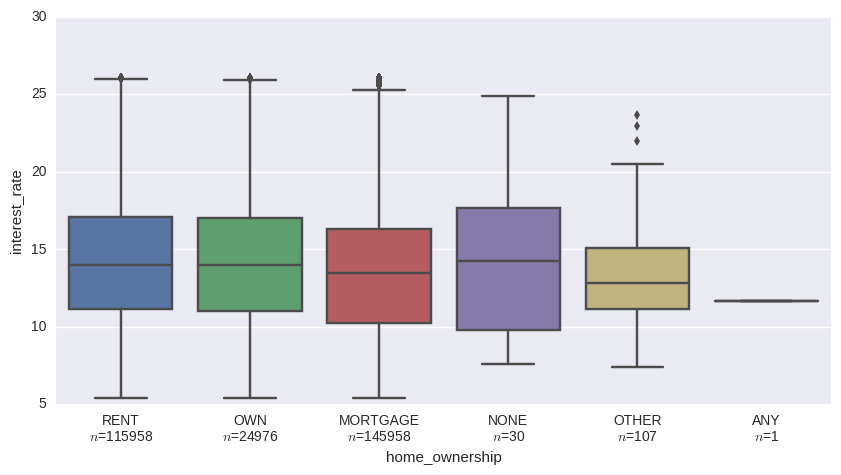

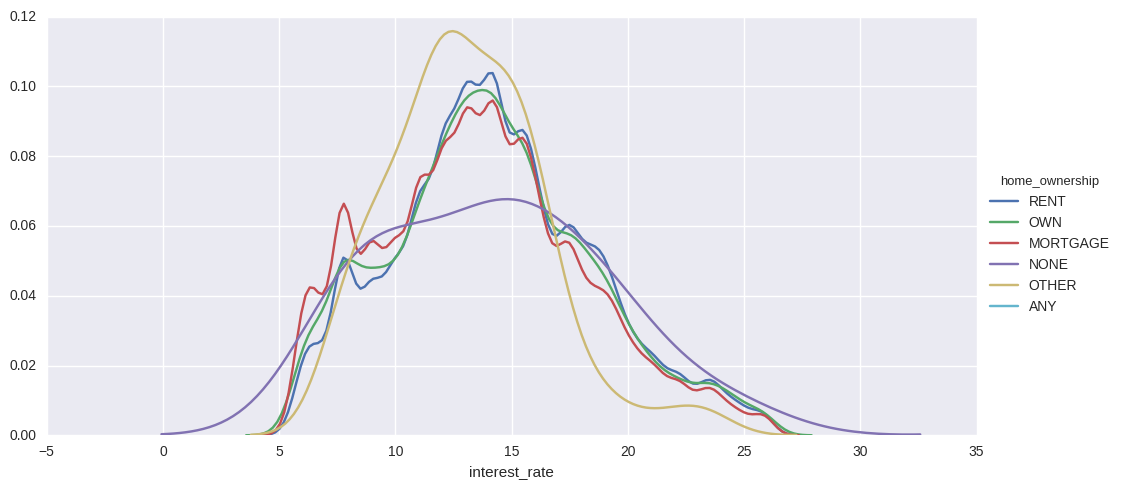

In [106]:
plot_target_dist_by_category('home_ownership', 'interest_rate')

#### Observation
There seems to be a very slight linear relation between MORTGAGE, OWN and RENT.The interest rate for MORTGAGE seems to be slightly lower than RENT and OWN

In [107]:
# x_var,y_var = 'years_employed','interest_rate'
# plot_data = df[[x_var,y_var]]
# ax = sns.boxplot(x=x_var, y=y_var, data=plot_data)
    
# len_dict = {str(k): len(v) for k, v in plot_data.groupby(x_var)}
# ax.set_xticklabels(['%s\n$n$=%d'%(item.get_text(), len_dict[item.get_text()]) for item in ax.get_xticklabels()])
# # item_texts = [item.get_text() for item in ax.get_xticklabels()]
# # len_dict[item_texts[0]]

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


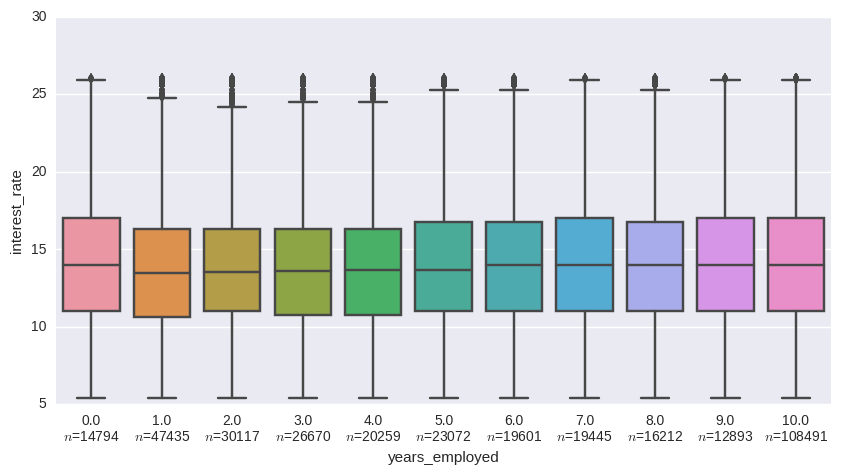

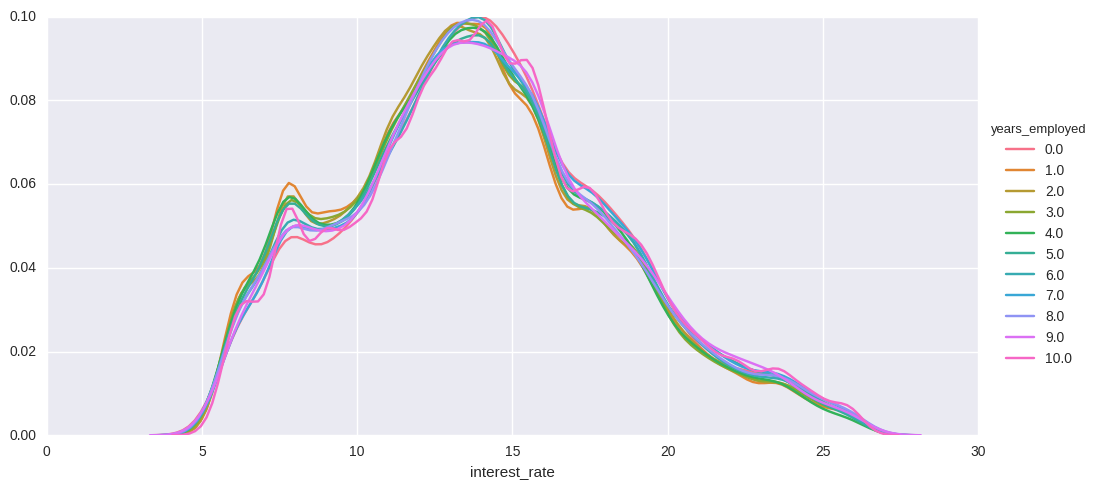

In [108]:
plot_target_dist_by_category('years_employed','interest_rate')

#### Visualizing the Boxplots and the KDE Plots for interest rate against years_employed, we can see that the distributions are very similar. The years_employed does not seem to discriminate interest_rate

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


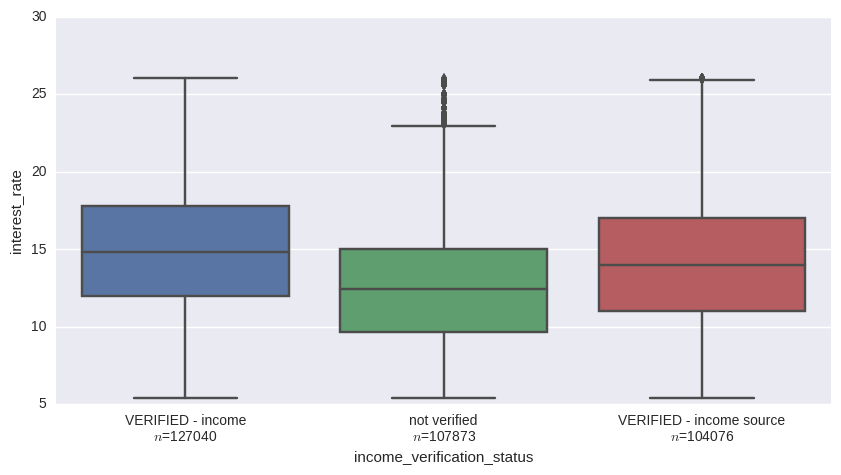

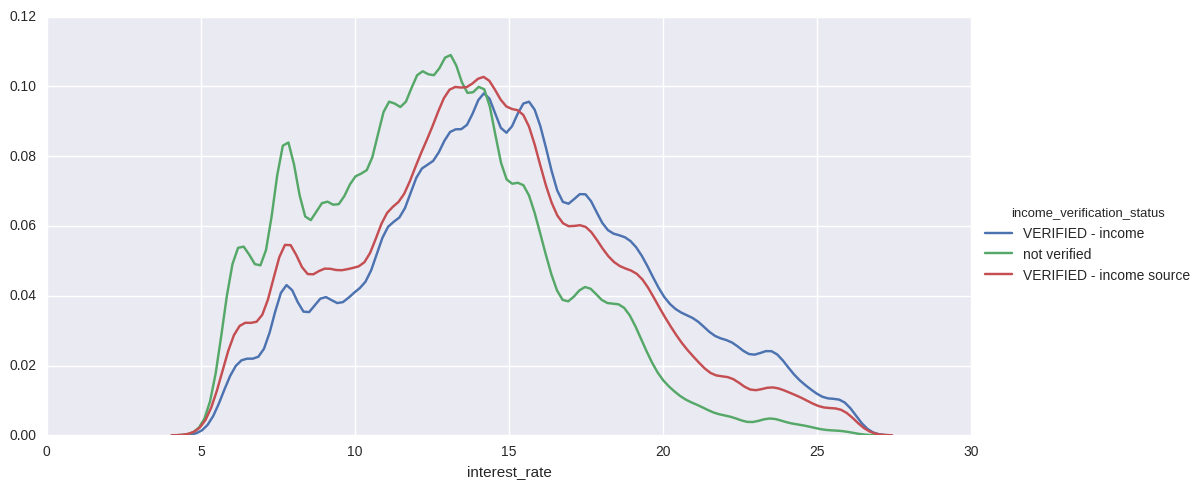

In [109]:
plot_target_dist_by_category('income_verification_status', 'interest_rate')

#### Observation:
This seems against intuition... Shouldnt the interest_rate be higher for income_verification_status = 'not verified'

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/subhash/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


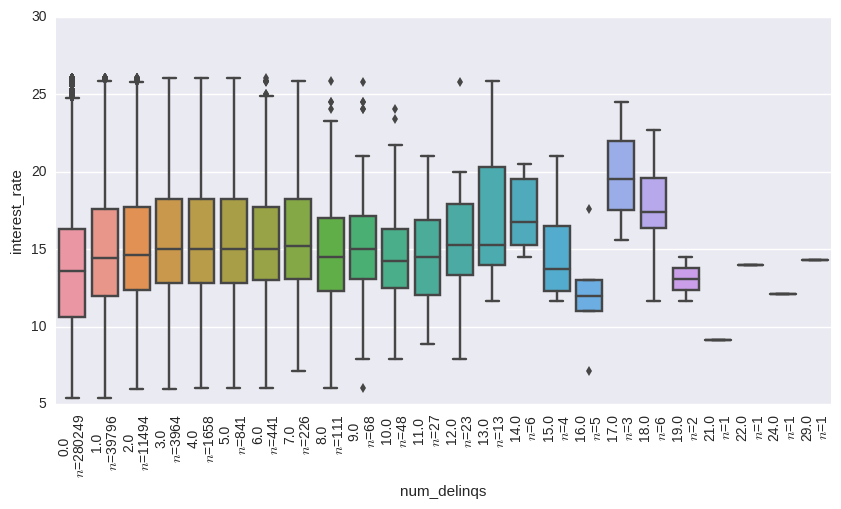

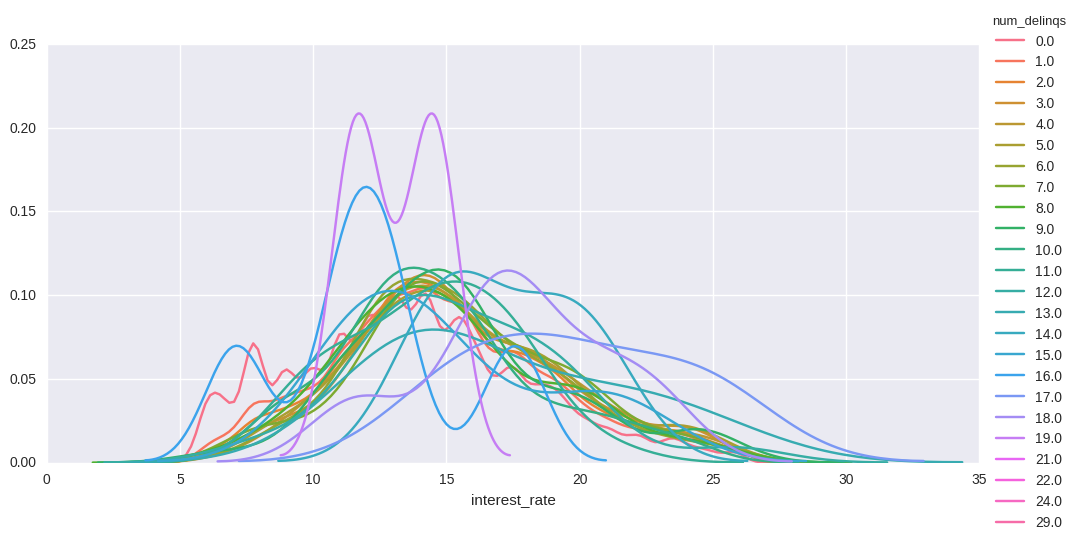

In [110]:
plot_target_dist_by_category('num_delinqs', 'interest_rate', rotate_x_labels=90)  

#### Observation:
We can see that interest rate increases as delinquencies increase.. Observe the boxplots that have higher num values

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


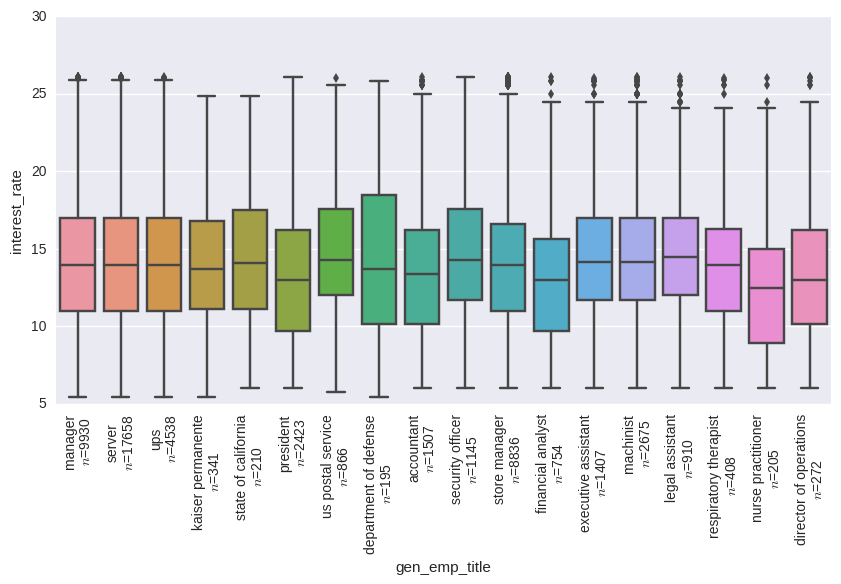

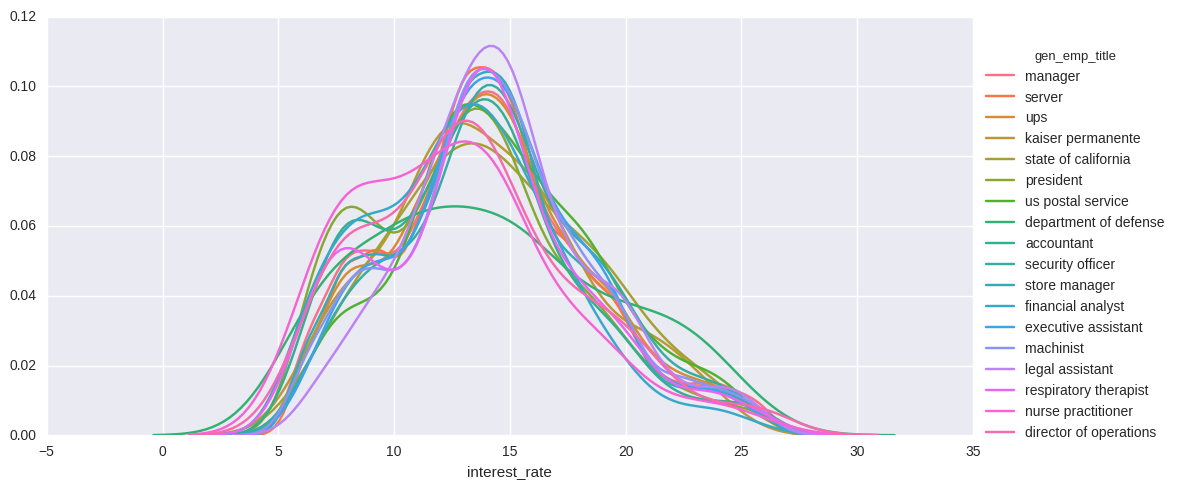

In [111]:
plot_target_dist_by_category('gen_emp_title', 'interest_rate', rotate_x_labels=90)

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


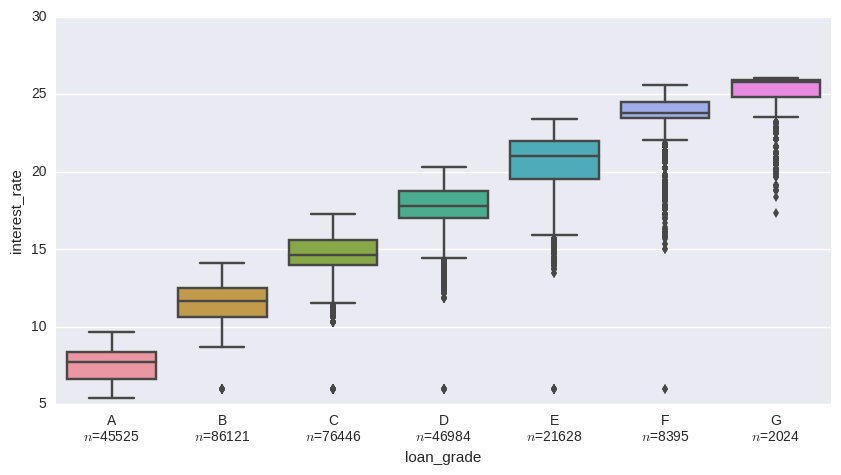

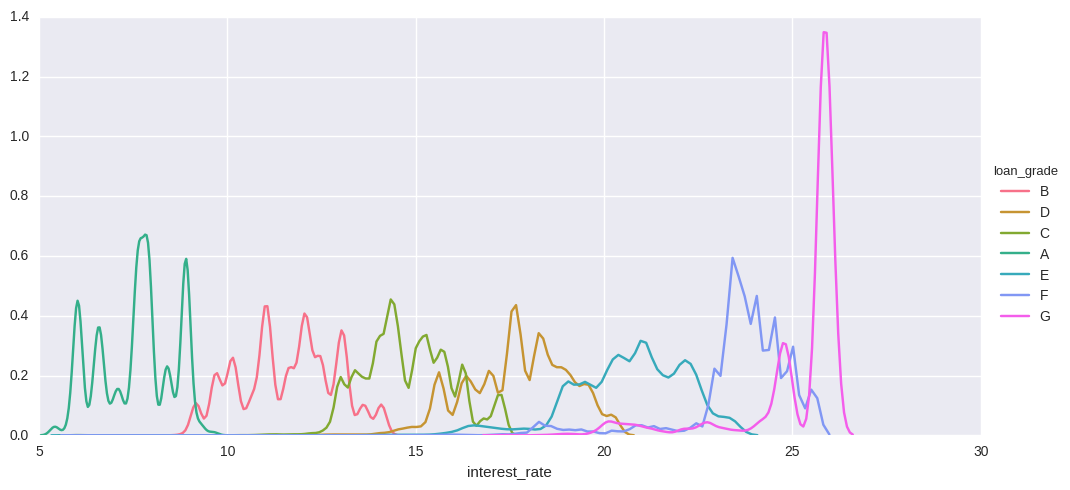

In [32]:
plot_target_dist_by_category('loan_grade', 'interest_rate', order_by_x=True)

#### Observation: 
Looks like this attribute is quite information, there seems to be a huge influence on the interest_rate based on the loan_grade. Look at the plot for Loan Grade A, its so low compared to the others

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


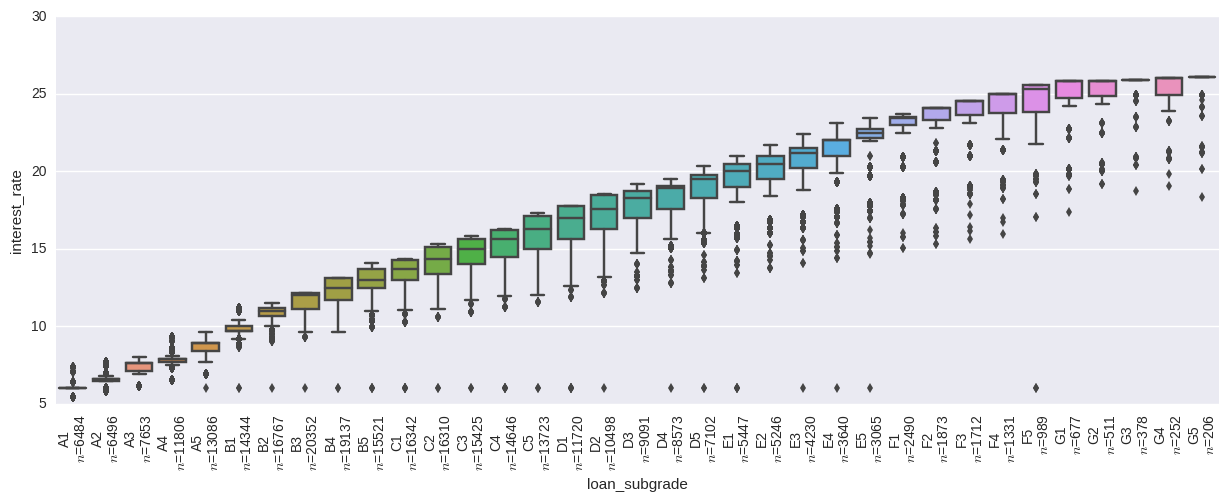

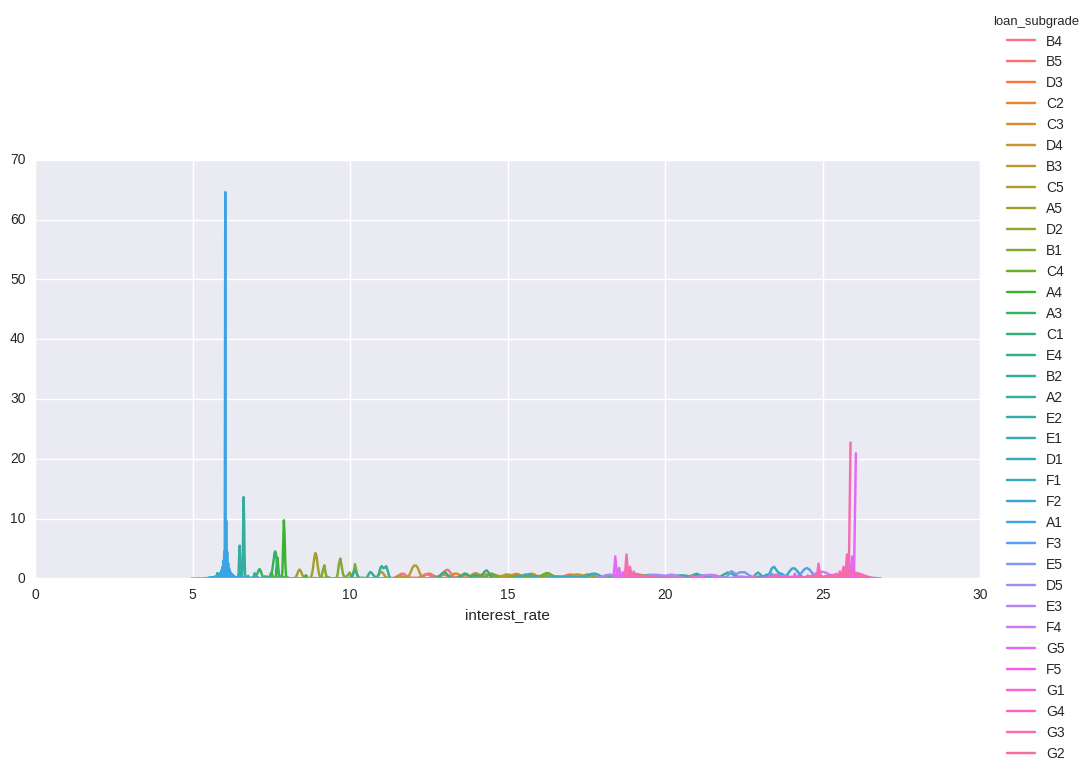

In [33]:
plot_target_dist_by_category('loan_subgrade', 'interest_rate', rotate_x_labels=90, fig_size=(15,5), order_by_x=True)

#### Observation: 
Looks like loan_subgrade is more informative than loan_grade.. 
We can retain loan_subgrade and drop loan_grade, as loan_subgrade contains more info than loan_grade and overides the information contained in it

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


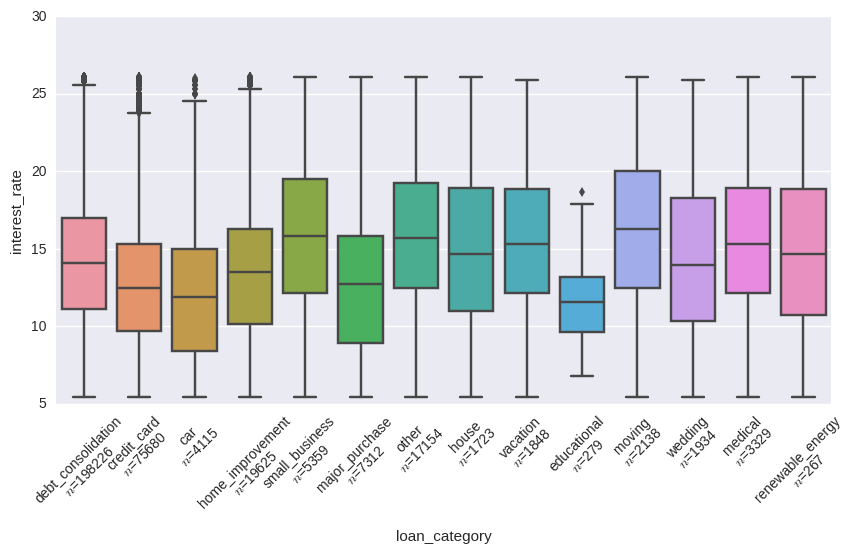

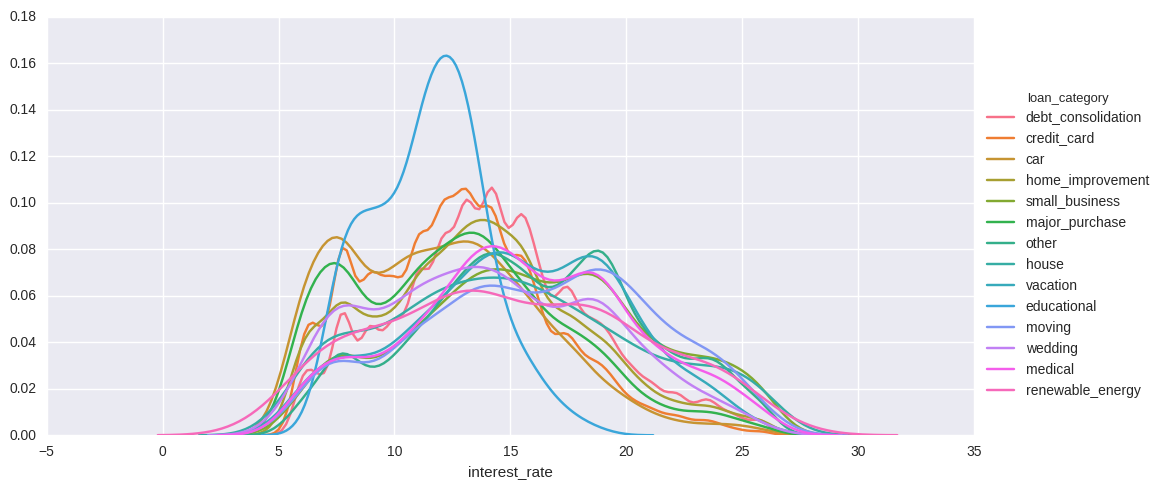

In [34]:
plot_target_dist_by_category('loan_category', 'interest_rate', rotate_x_labels=45)

#### Observation:
The interest_rate on Credit card, car and educational loan seems to be a little lower. Maybe there are some special offers for these categories

In [12]:
# Lets look for any more missing values
pd.DataFrame([(col,df[col].isnull().sum(),df[col].notnull().sum(), df[col].dtype) for col in df.columns], 
             columns=['column name', 'num nulls', 'num notnulls', 'data type'])

column name  num nulls  num notnulls data type
0                interest_rate      61010        338990    object
1                      loan_id          1        399999   float64
2                  borrower_id          1        399999   float64
3                  request_amt          1        399999    object
4                   funded_amt          1        399999    object
5          investor_funded_amt          1        399999    object
6              num_instalments          1        399999    object
7                   loan_grade      61270        338730    object
8                loan_subgrade      61270        338730    object
9              emp_or_jobtitle      23982        376018    object
10              years_employed          1        399999    object
11              home_ownership      61361        338639    object
12               annual_income      61028        338972   float64
13  income_verification_status          1        399999    object
14             loan_issue_date          1        399999    object
15                 loan_reason     276439        123561    object
16               loan_category          1        399999    object
17                  loan_title         18        399982    object
18                    zip_code          1        399999    object
19                       state          1        399999    object
20           debt_income_ratio          1        399999   float64
21                 num_delinqs          1        399999   float64
22        earliest_credit_line          1        399999    object
23        num_credit_inquiries          1        399999   float64
24    months_since_last_delinq     218802        181198   float64
25       months_since_last_rec     348845         51155   float64
26           open_credit_lines          1        399999   float64
27          num_derog_pub_recs          1        399999   float64
28               revolving_bal          1        399999   float64
29         revolving_line_util        267        399733    object
30            tot_credit_lines          1        399999   float64
31         initial_list_status          1        399999    object

In [36]:
# Lets analyze the annual income data
pd.options.display.float_format = '{:20,.2f}'.format
df[df.annual_income.notnull()].annual_income.describe()

count             287,238.00
mean               73,151.46
std                56,189.67
min                 3,000.00
25%                45,000.00
50%                63,000.00
75%                88,078.75
max             7,500,000.00
Name: annual_income, dtype: float64

(10000, 33)


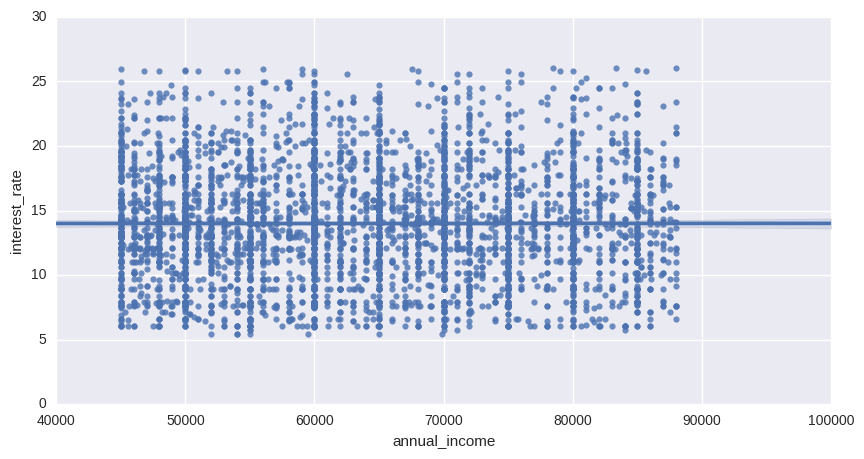

In [37]:
plot_reg('annual_income', 'interest_rate', n_samples=10000)

#### Observation: 
Doesn't look like there is a strong correlation between annual_income and interest_rate.. against what I expected..

If you are wondering why we are seeing those vertical streaks.. 
those are because of the way incomes are recorded (usually in multiples of 1000), hence a strong density
along those lines

In [38]:
# Lets analyze debt income ratio, hopefully there's something here..
df[df.debt_income_ratio.notnull()].debt_income_ratio.describe()

count             338,989.00
mean                   17.00
std                     7.70
min                     0.00
25%                    11.25
50%                    16.70
75%                    22.50
max                    39.99
Name: debt_income_ratio, dtype: float64

(10000, 33)


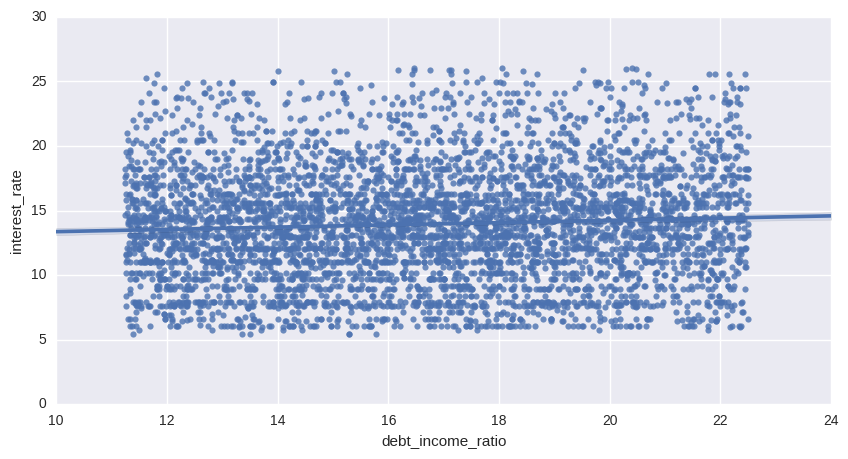

In [39]:
plot_reg("debt_income_ratio", "interest_rate", n_samples=10000)

#### Observation:
There is a very slight increase in interest_rate as debt_income_ratio increases

In [40]:
# Lets analyze the earliest_credit_line variable
# Its useful to have this variable as a quantitative information of the length of time since 
# a borrower has had the first credit line

df['earliest_credit_line'] = pd.to_datetime(df.earliest_credit_line, format='%b-%y')

# ALso, the years do not have centuries, so doing a little hack to correct the date
# when it gets wrong.. ex. May-63 is interepreted as 01-May-2063, instead of 01-May-1963
df.ix[df.earliest_credit_line > pd.datetime.now().date(),'earliest_credit_line'] = \
        df.ix[df.earliest_credit_line > pd.datetime.now().date(),'earliest_credit_line'] - pd.Timedelta(days = 365*100)

df['earliest_credit_line'] = \
(pd.to_timedelta(pd.datetime.now().date() - pd.to_datetime(df.earliest_credit_line, format='%b-%y'))).dt.days


(10000, 33)


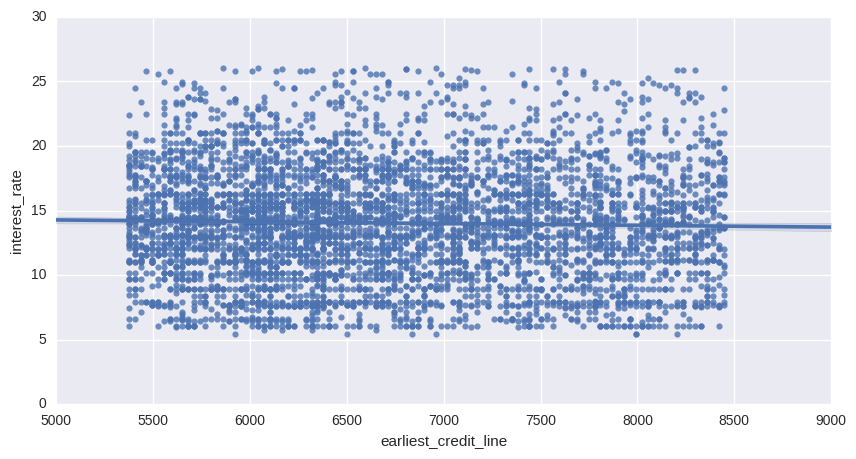

In [41]:
plot_reg('earliest_credit_line', 'interest_rate', n_samples=10000)

#### Observation:
There is a very slight decrease in interest_rate as earliest_credit_line increases

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


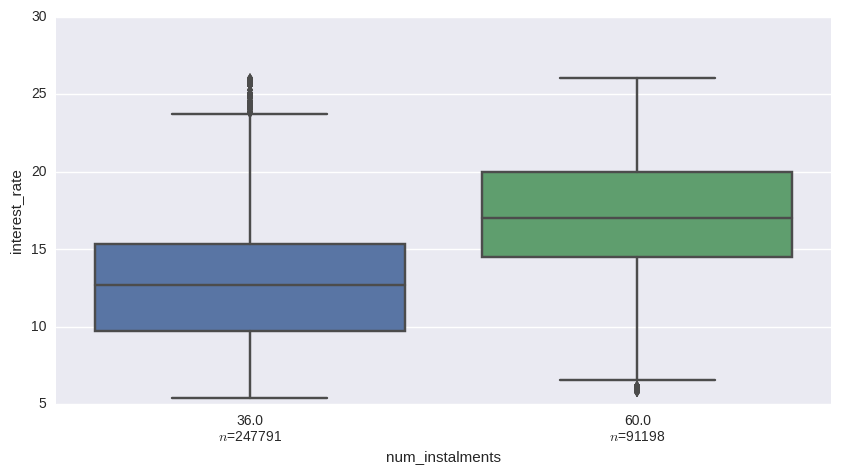

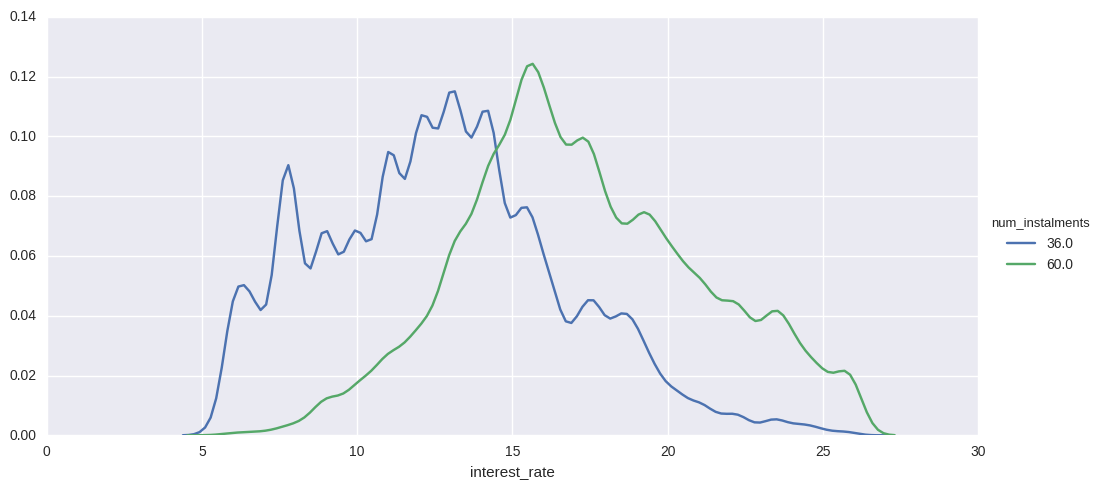

In [42]:
# Lets analyze num_instalments
plot_target_dist_by_category('num_instalments', 'interest_rate')

# Observation:
num_instalments seems to be a good predictor, the interest_rate for higher instalments seem to be higher

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


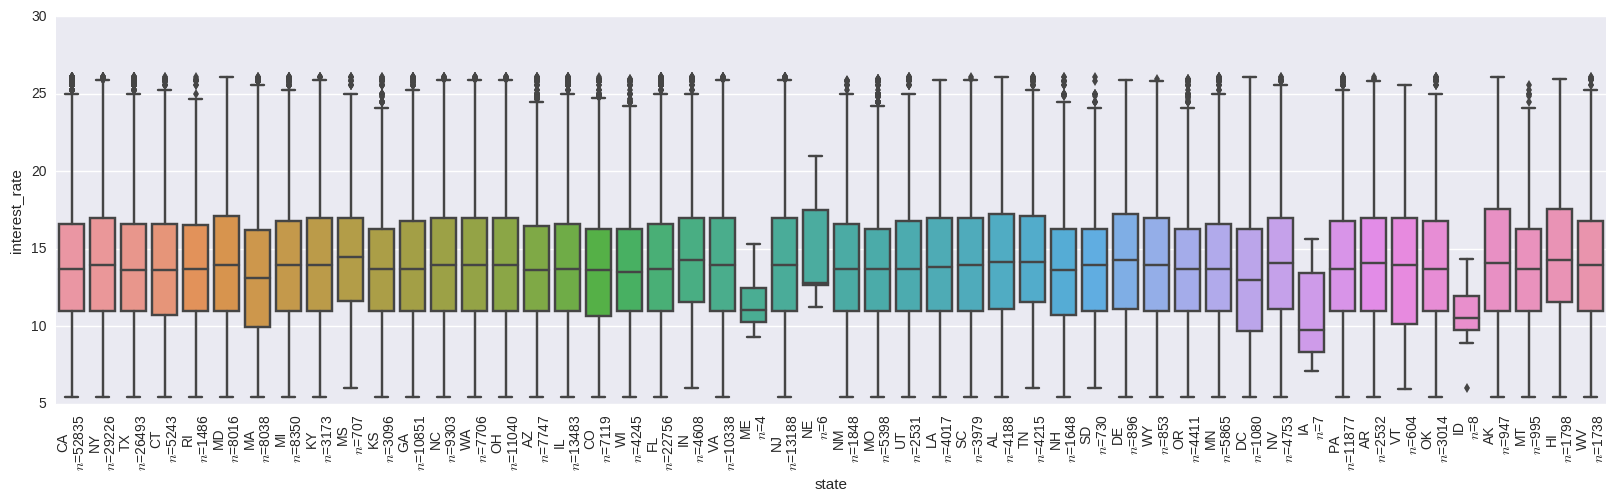

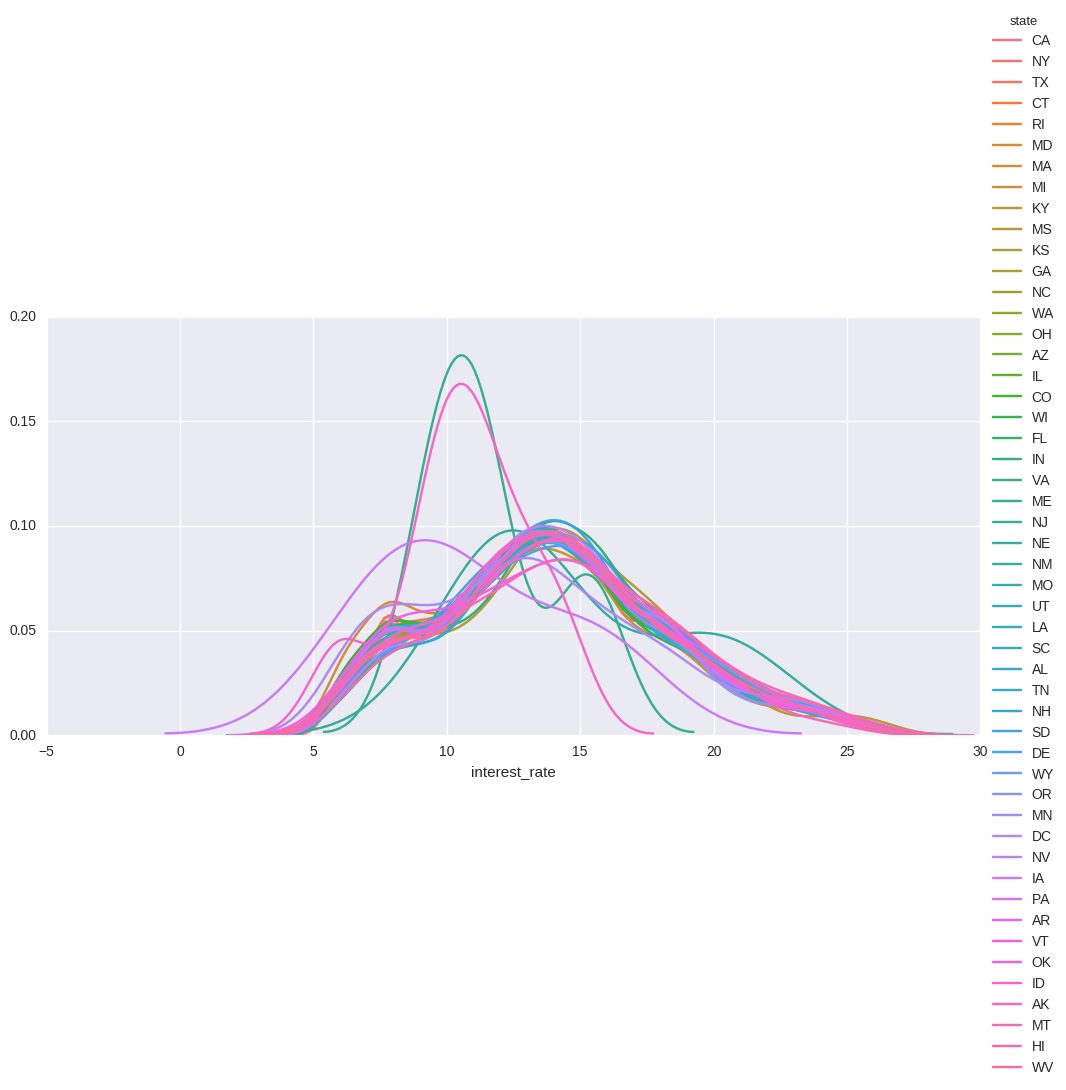

In [43]:
plot_target_dist_by_category('state', 'interest_rate', rotate_x_labels=90, fig_size=(20,5))

#### Observation
Except for a couple of states MI, SD and VT which actually have low occurences, it doesnt seem to influence much


(10000, 33)


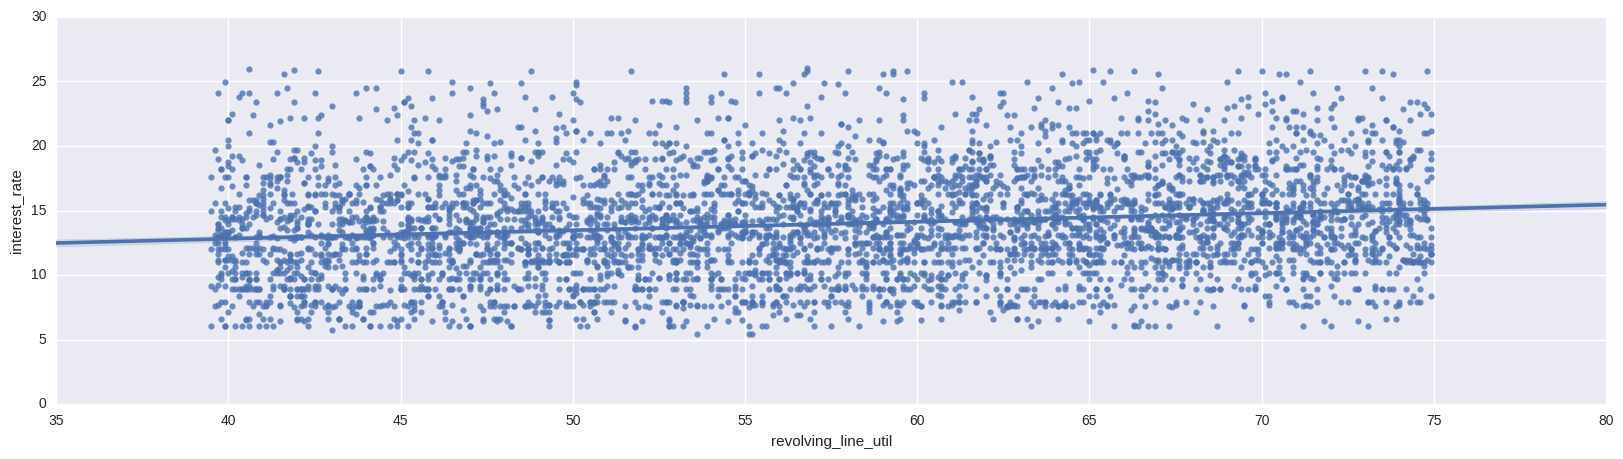

In [44]:
plot_reg('revolving_line_util', 'interest_rate', n_samples=10000)

#### Observation:
There seems to be some positive correlation between revolving_line_util and interest_rate

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


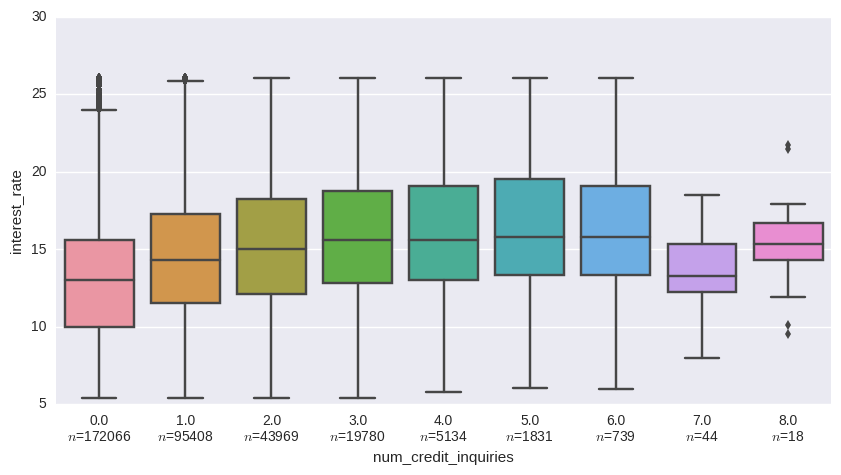

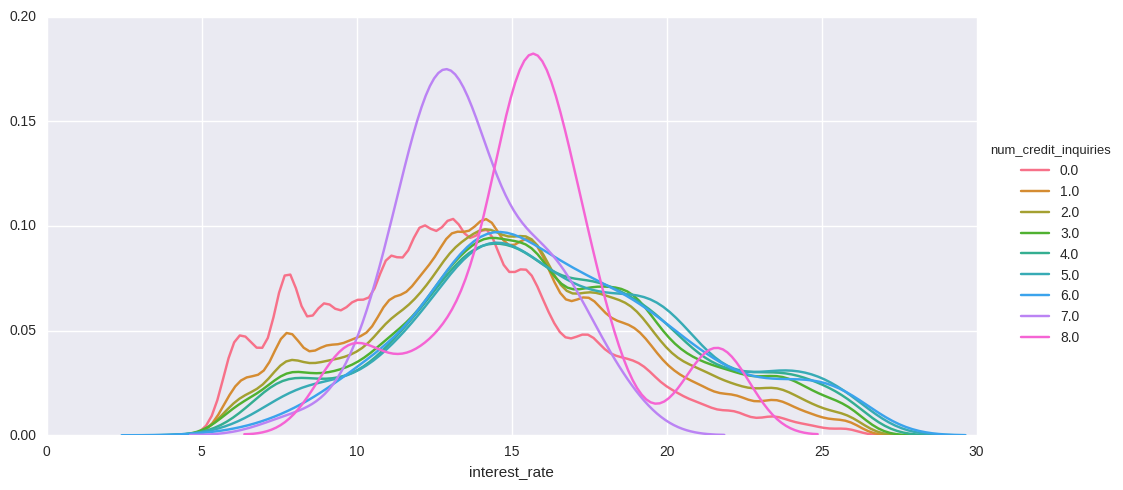

In [45]:
plot_target_dist_by_category('num_credit_inquiries', 'interest_rate')

(338989, 33)


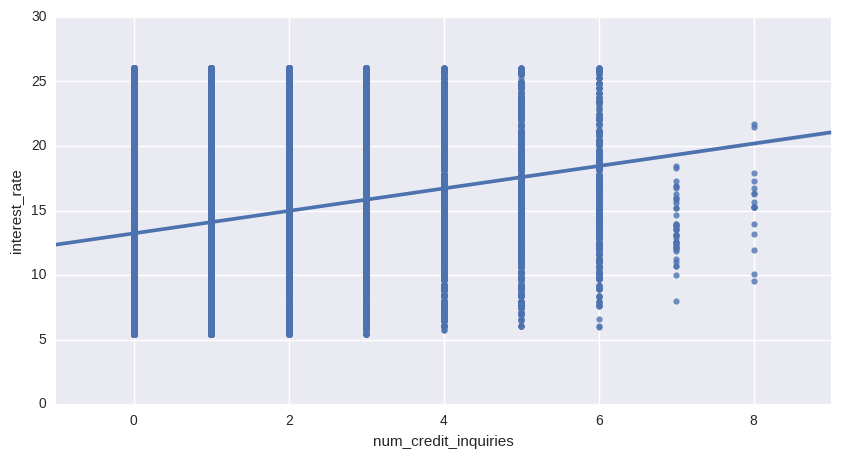

In [46]:
plot_reg('num_credit_inquiries', 'interest_rate', within_IQR=False)

#### Observation:
There seems to be a good linear relation between num_credit_inquiries and interest_rate

(10000, 33)


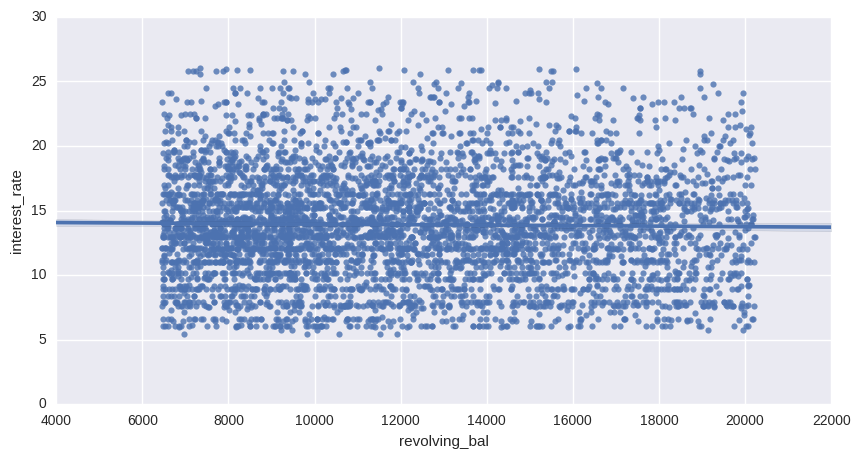

In [47]:
plot_reg('revolving_bal', 'interest_rate', n_samples=10000)

(10000, 33)


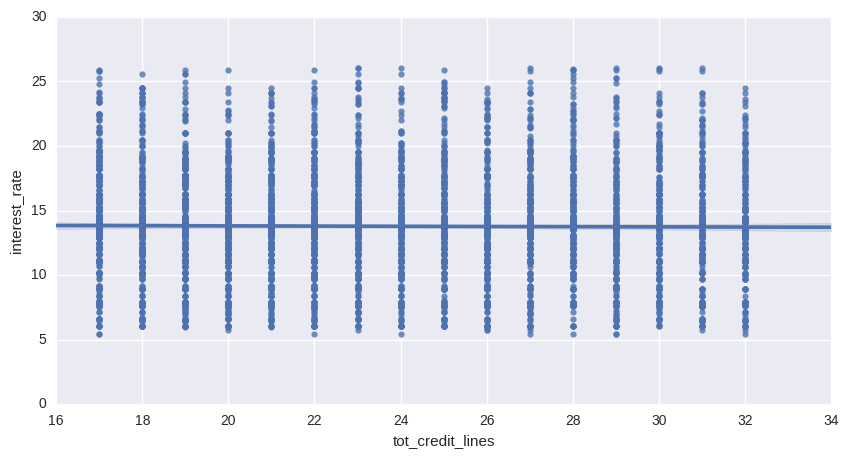

In [48]:
plot_reg('tot_credit_lines', 'interest_rate', n_samples=10000)

#### Observation:
there doesnt seem to be any linear relationship here

(10000, 33)


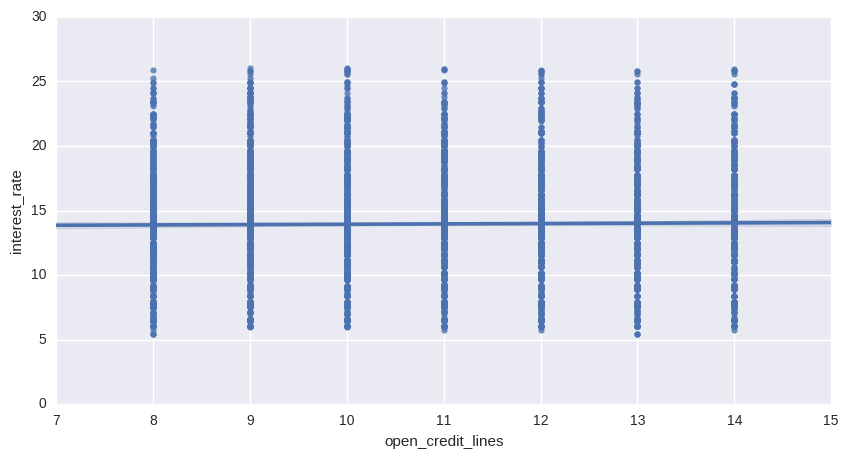

In [49]:
plot_reg('open_credit_lines', 'interest_rate', n_samples=10000)

#### Observation
nothing again

(10000, 33)


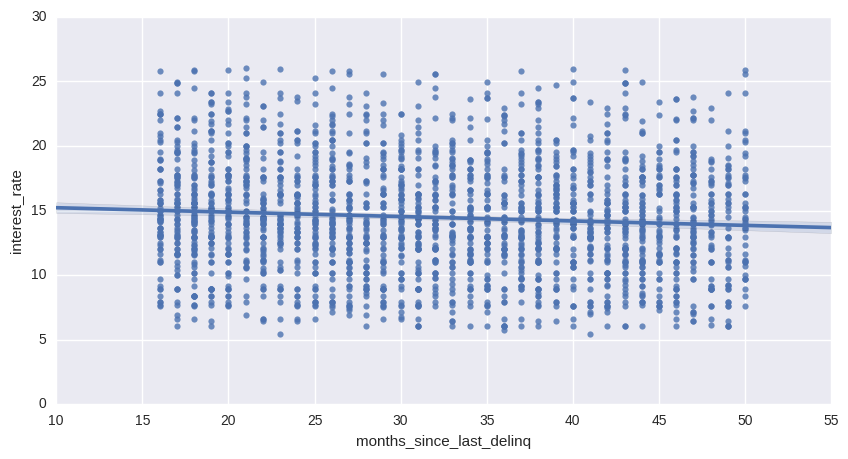

In [50]:
plot_reg(df.months_since_last_delinq.name, df.interest_rate.name,n_samples=10000)

(10000, 33)


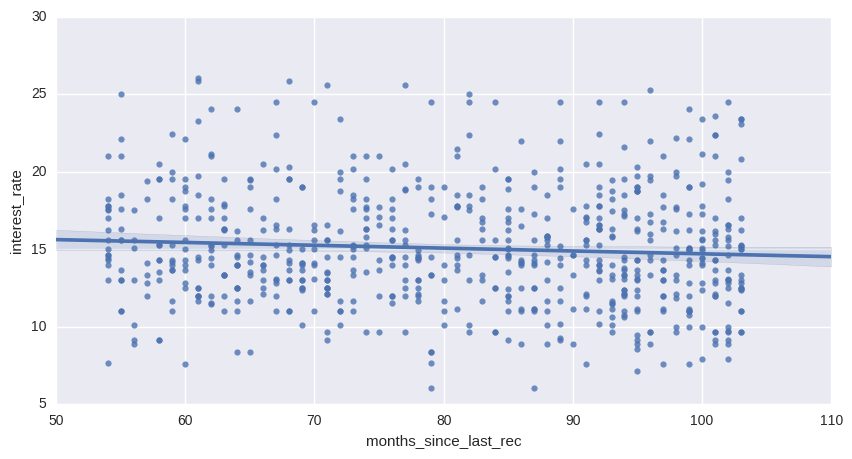

In [51]:
plot_reg(df.months_since_last_rec.name, df.interest_rate.name, n_samples=10000)

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/subhash/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


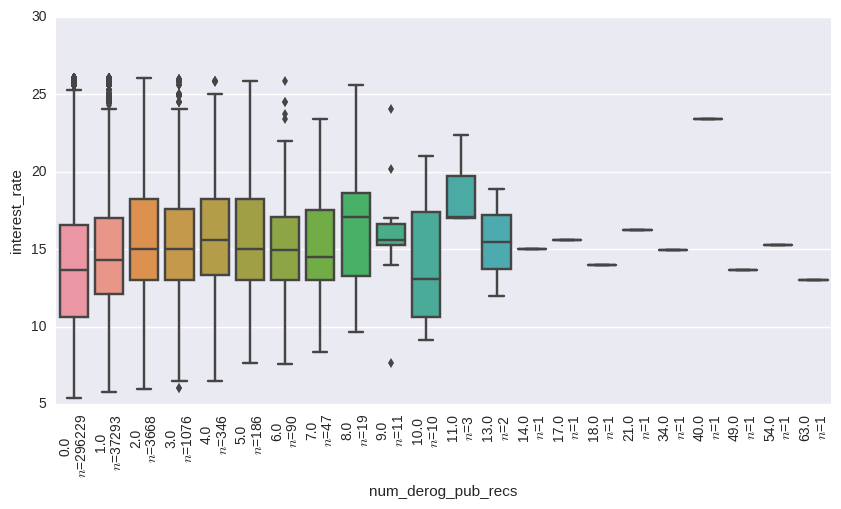

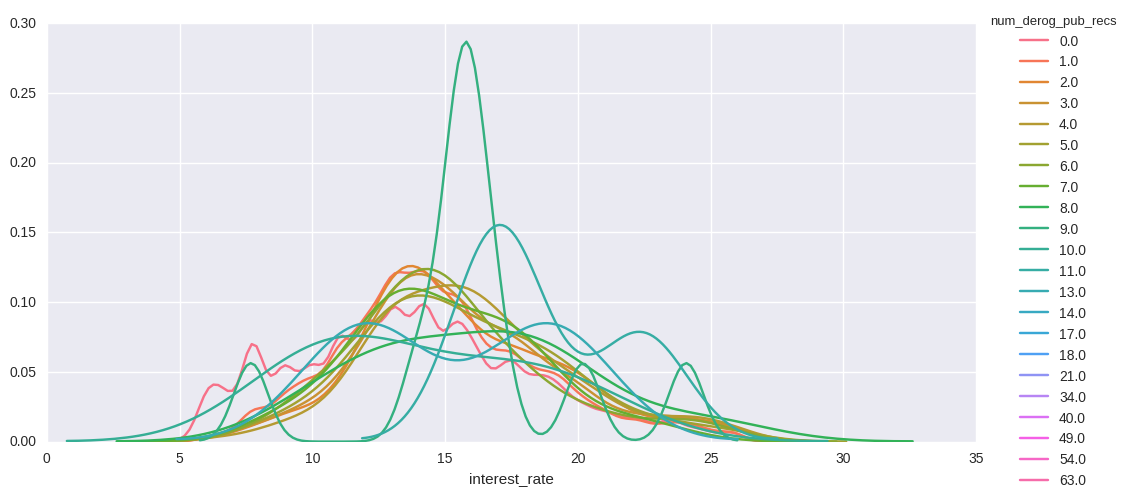

In [52]:
plot_target_dist_by_category(df.num_derog_pub_recs.name, df.interest_rate.name, rotate_x_labels=90)

(10000, 33)


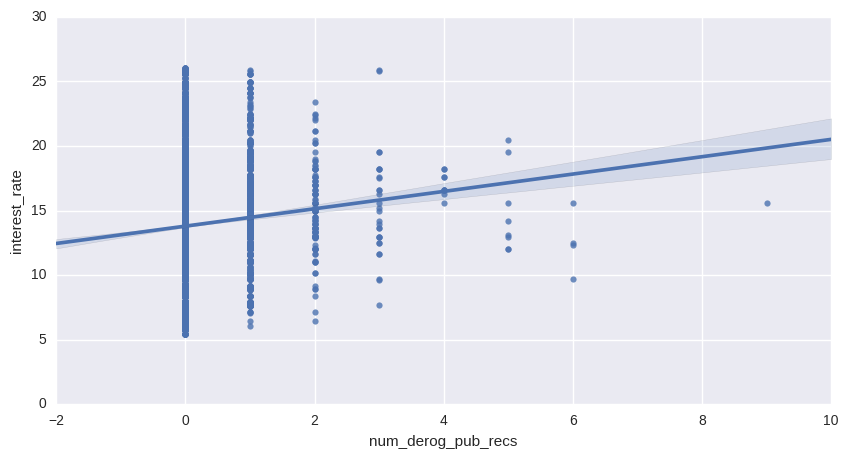

In [53]:
plot_reg(df.num_derog_pub_recs.name, df.interest_rate.name, within_IQR=False, n_samples=10000)

#### Observation:
 There seems to be positive correlation between num_derog_pub_recs and interest_rate

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


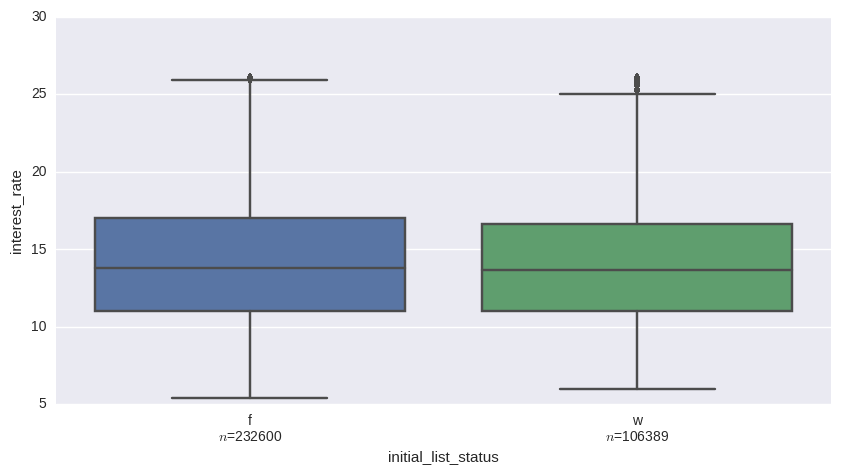

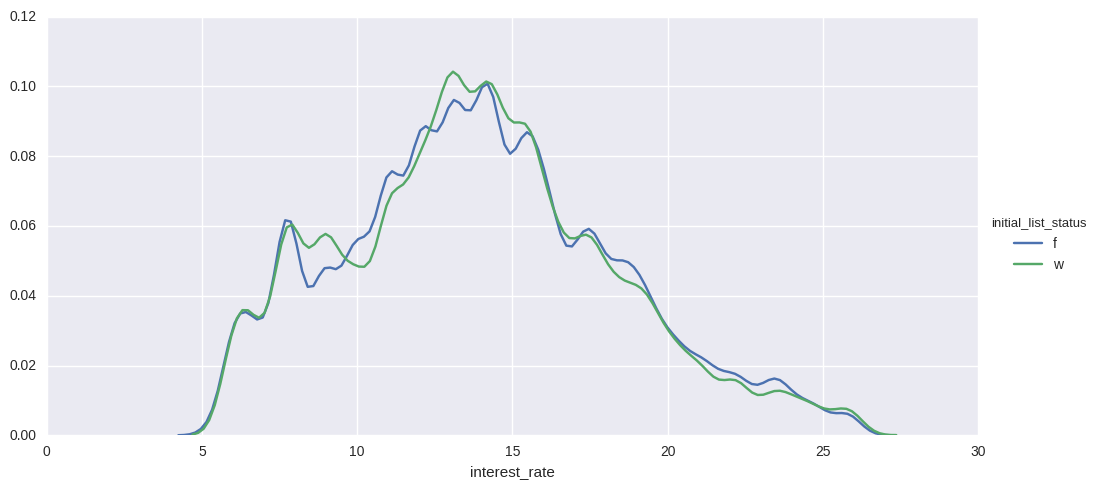

In [54]:
plot_target_dist_by_category(df.initial_list_status.name, df.interest_rate.name)

#### Observation:
The initial_list_status variable does not seem to have any influence on interest_rate

In [55]:
df['loan_issue_date'] = pd.to_datetime(df.loan_issue_date, format='%b-%y')

# ALso, the years do not have centuries, so doing a little hack to correct the date
# when it gets wrong.. ex. May-63 is interepreted as 01-May-2063, instead of 01-May-1963
df.ix[df.loan_issue_date > pd.datetime.now().date(),'loan_issue_date'] = \
        df.ix[df.loan_issue_date > pd.datetime.now().date(),'loan_issue_date'] - pd.Timedelta(days = 365*100)

df['issue_year'] = df.loan_issue_date.dt.year
df['issue_month'] = df.loan_issue_date.dt.month

f    232600
w    106389
Name: initial_list_status, dtype: int64

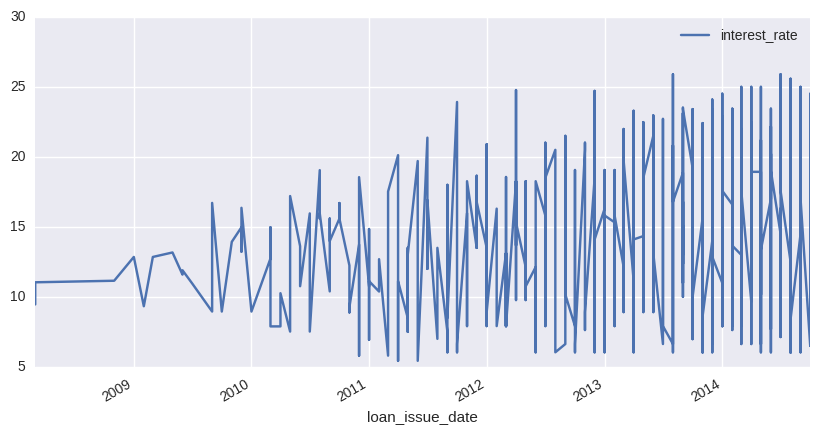

In [81]:
idx = np.random.choice(df.index.values, 1000)
plot_data = df.ix[idx]
# sns.plt(df.loan_issue_date.name, df.interest_rate.name, within_IQR=False,n_samples=1000)
plot_data.plot(kind='line', x='loan_issue_date', y=['interest_rate'])

(10000, 28)


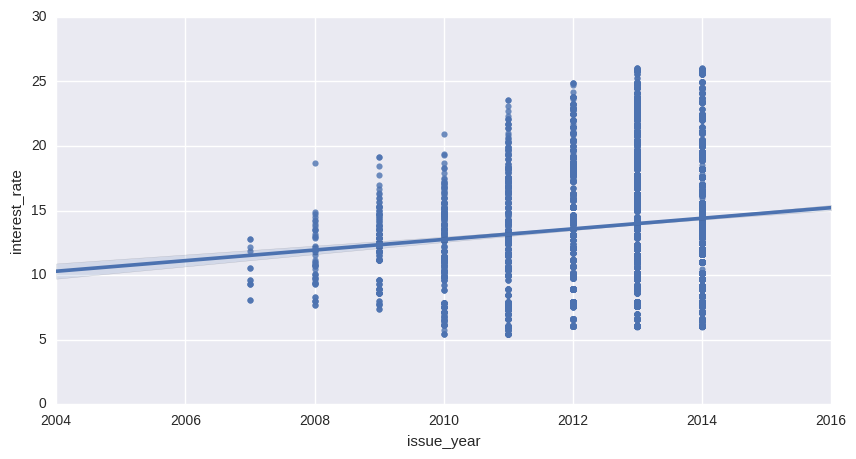

In [82]:
plot_reg(df.issue_year.name, df.interest_rate.name, within_IQR=False, n_samples=10000)

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


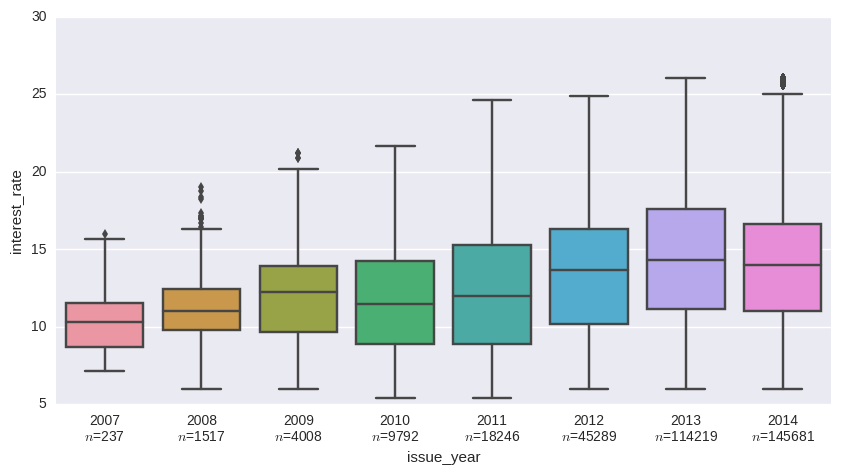

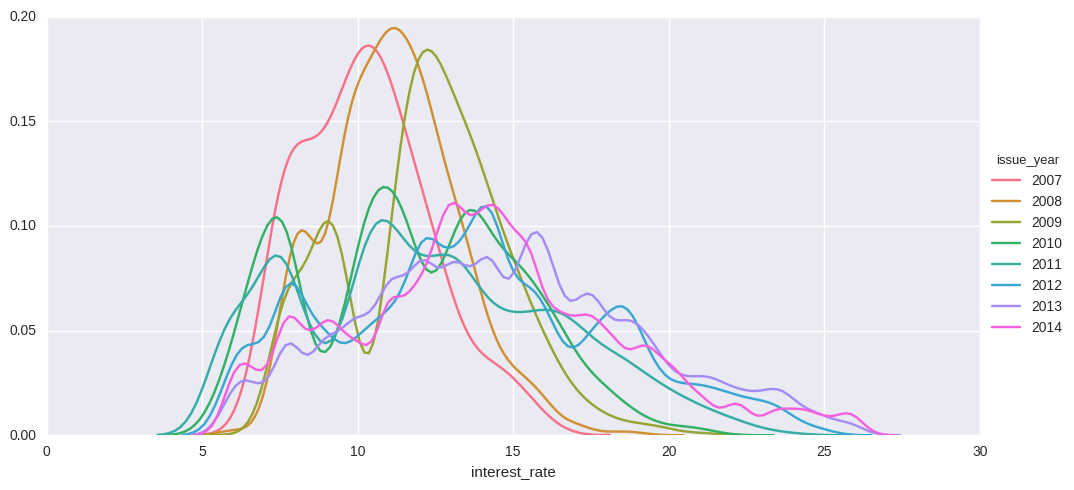

In [83]:
plot_target_dist_by_category(df.issue_year.name, df.interest_rate.name)

/home/subhash/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


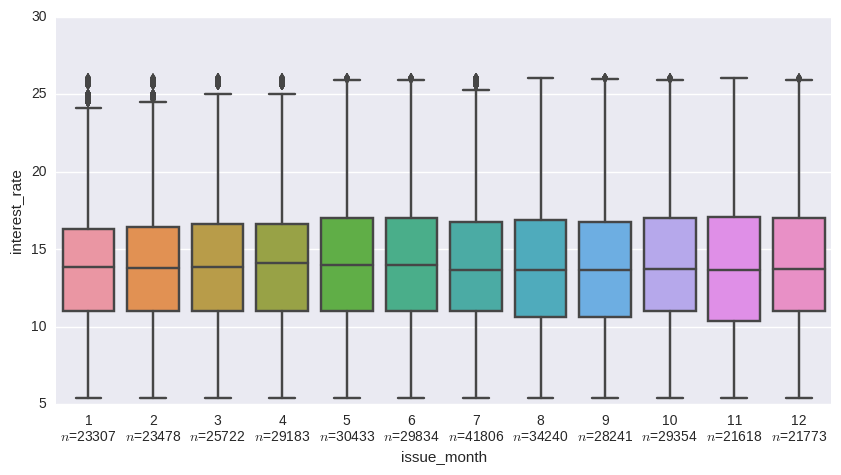

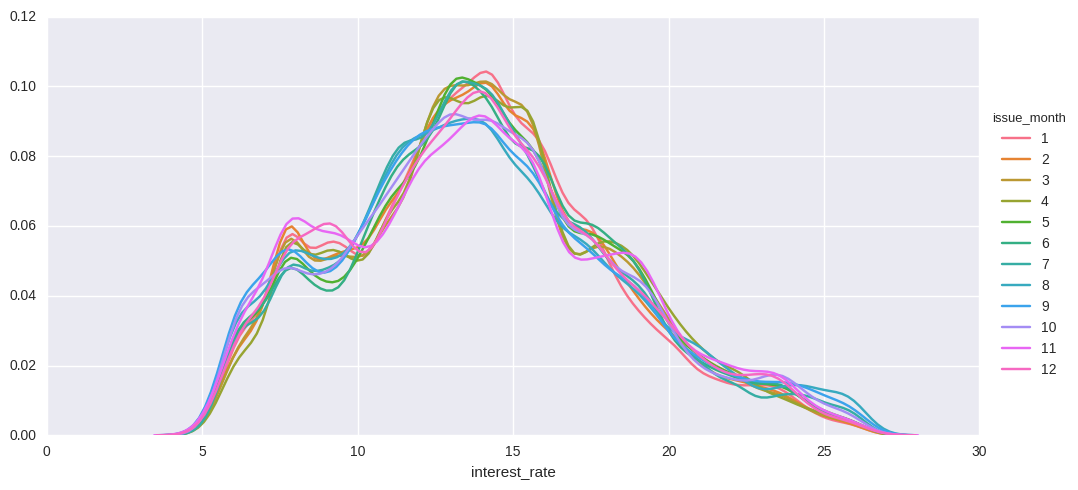

In [84]:
plot_target_dist_by_category(df.issue_month.name, df.interest_rate.name)

(10000, 33)
(10000, 33)


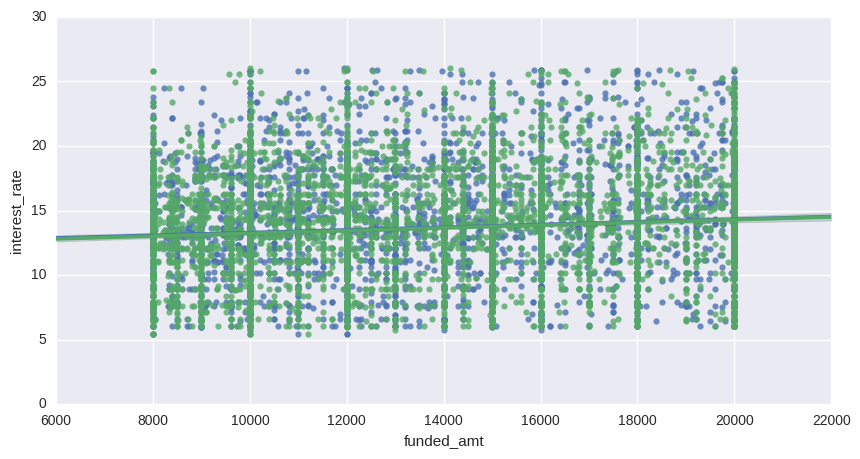

In [56]:
plot_reg(df.request_amt.name, df.interest_rate.name, n_samples=10000)
plot_reg(df.funded_amt.name, df.interest_rate.name, n_samples=10000)

In [57]:
# There appears to be a very strong correlation between request_amt and funded_amt
# Lets check on what that is as many rows appear same..
print('Num rows with request amount different from funded amount:', (df.request_amt!=df.funded_amt).sum())

Num rows with request amount different from funded amount: 1651


In [122]:
# Lets look at the correlations among the input variables.. 
# and remove the redundant variables..

c = df.corr().abs()
c.loc[:,:] = np.tril(c, k=-1)
c.stack()[c.stack()>0.3].sort_values(ascending=False)

months_since_last_rec_is_missing                     months_since_last_rec                                                 0.92
                                                     num_derog_pub_recs                                                    0.79
months_since_last_delinq_is_missing                  months_since_last_delinq                                              0.76
num_derog_pub_recs                                   months_since_last_rec                                                 0.68
tot_credit_lines                                     open_credit_lines                                                     0.68
loan_category_debt_consolidation                     loan_category_credit_card                                             0.64
home_ownership_RENT                                  home_ownership_MORTGAGE                                               0.63
gen_emp_title_server                                 gen_emp_title_NA                                   

##### We can drop funded_amt, investor_funded_amt as they are duplicates of request_amt.
##### We can drop loan_id, borrower_id as they are just ID numbers and dont contain any explanatory information 

##### Also, lets drop loan_grade,  as was observed and noted above

##### Also, lets drop zip_code, state as they are not informative as  was observed and noted above, and also with too many 
##### they will create too many dimensions, upon encoding and more problems in learning the model well

##### Also, lets drop initial_list_status as was noted above

##### loan_title seems to be a duplicate of loan_category and seems to be a free form text.. so we can retain loan_category and drop loan_title


In [59]:
df.drop(['loan_id','borrower_id','funded_amt', 'investor_funded_amt'], axis=1, inplace=True)
df.drop(['loan_grade'], axis=1, inplace=True)
df.drop(['initial_list_status','zip_code', 'state'], axis=1, inplace=True)
df.drop('loan_reason', axis=1, inplace=True)
df.drop('loan_title', axis=1, inplace=True)
df.drop('emp_or_jobtitle', axis=1, inplace=True)

df.drop('loan_title', axis=1, inplace=True)
df.drop('emp_or_jobtitle', axis=1, inplace=True)


In [85]:
df.drop('loan_issue_date', axis=1, inplace=True)
df.drop('issue_month', axis=1, inplace=True)

In [60]:
# We will replace all categorical missing values with a new category - lets say NA

df.loc[df['loan_subgrade'].isnull(), 'loan_subgrade'] = 'NA'
df.loc[df['gen_emp_title'].isnull(), 'gen_emp_title'] = 'NA'
df.loc[df['home_ownership'].isnull(), 'home_ownership'] = 'NA'


In [61]:
# We will impute all real valued variables with 0 and add an indicator variable to indicate missingness
# so the new indicator variable will have a value 1 when the data is missing, else 0
# In a linear model this will have a nice effect of automatically learning an approriate co-efficient or a constant 
# value, when the data is missing

df['annual_income_is_missing']=0
df.loc[df['annual_income'].isnull(), 'annual_income_is_missing'] = 1
df.loc[df['annual_income'].isnull(), 'annual_income'] = 0

df['months_since_last_delinq_is_missing']=0
df.loc[df['months_since_last_delinq'].isnull(), 'months_since_last_delinq_is_missing'] = 1
df.loc[df['months_since_last_delinq'].isnull(), 'months_since_last_delinq'] = 0

df['months_since_last_rec_is_missing']=0
df.loc[df['months_since_last_rec'].isnull(), 'months_since_last_rec_is_missing'] = 1
df.loc[df['months_since_last_rec'].isnull(), 'months_since_last_rec'] = 0

df['revolving_line_util_is_missing']=0
df.loc[df['revolving_line_util'].isnull(), 'revolving_line_util_is_missing'] = 1
df.loc[df['revolving_line_util'].isnull(), 'revolving_line_util'] = 0

In [87]:
df = pd.get_dummies(df)

In [92]:
df

interest_rate          request_amt      num_instalments  \
0                     11.89            25,000.00                36.00   
1                     10.71             7,000.00                36.00   
2                     16.99            25,000.00                36.00   
3                     13.11             1,200.00                36.00   
4                     13.57            10,800.00                36.00   
5                     19.05             7,200.00                36.00   
6                     10.08             7,500.00                36.00   
7                     14.26             3,000.00                36.00   
8                      7.88             4,000.00                36.00   
9                     14.96             5,600.00                36.00   
10                     9.88             3,200.00                36.00   
11                    11.14             4,000.00                36.00   
12                    11.34             5,000.00                36.00   
13                    12.21             2,525.00                36.00   
14                    13.47            10,625.00                36.00   
15                    11.49             2,800.00                60.00   
16                    13.24             7,500.00                36.00   
17                     8.59            10,000.00                36.00   
18                     7.14             3,000.00                36.00   
19                     8.63             6,625.00                36.00   
20                    11.03            10,000.00                36.00   
21                     8.94            15,000.00                36.00   
22                    10.39            18,000.00                36.00   
23                    15.13             5,000.00                36.00   
24                     8.00             6,000.00                36.00   
25                    15.33            11,200.00                60.00   
26                     8.63            15,000.00                36.00   
27                    13.55            10,000.00                36.00   
28                    12.29             9,600.00                36.00   
29                     9.01             5,000.00                36.00   
...                     ...                  ...                  ...   
338959                 8.39             5,275.00                36.00   
338960                24.50            17,500.00                60.00   
338961                13.98             5,000.00                36.00   
338962                 9.17            12,500.00                36.00   
338963                 8.39            12,000.00                36.00   
338964                16.29            12,800.00                60.00   
338965                13.98            25,900.00                36.00   
338966                 7.12             8,000.00                36.00   
338967                18.24            14,375.00                36.00   
338968                16.99             7,500.00                36.00   
338969                 9.17             5,000.00                36.00   
338970                20.20            30,000.00                60.00   
338971                12.49             5,000.00                36.00   
338972                20.20            25,000.00                60.00   
338973                15.61             6,000.00                36.00   
338974                15.61            23,325.00                36.00   
338975                11.67            20,000.00                60.00   
338976                 7.12            15,000.00                36.00   
338977                13.98             8,000.00                36.00   
338978                15.61             2,000.00                36.00   
338979                14.99            14,100.00                36.00   
338980                14.49             7,500.00                36.00   
338981                17.57            26,000.00                60.00   

In [93]:
y = df.interest_rate.values
df.drop('interest_rate',axis = 1, inplace=True)

In [94]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.grid_search import GridSearchCV

X, y = shuffle(df.values, y, random_state=30)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.75)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1.0, 0.3, 0.1]
              }
# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }

est = GridSearchCV(ensemble.GradientBoostingRegressor(n_estimators=100),
                   param_grid, n_jobs=4, refit=True)

est.fit(X_train, y_train)

best_params = est.best_params_

In [95]:
%%time
est = ensemble.GradientBoostingRegressor(n_estimators=2000).fit(X_train, y_train)

CPU times: user 43min 19s, sys: 188 ms, total: 43min 20s
Wall time: 43min 22s


In [96]:
est.score(X_test,y_test)

0.92585795998484288

In [97]:
est.score

<bound method RegressorMixin.score of GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)>

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge



In [98]:
%%time

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

pipeline = Pipeline([('scl', StandardScaler()),('clf', LinearRegression(random_state=1))])
pipeline.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipeline.score(X_test, y_test))


LinearRegression

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.73 ms


In [104]:
reg_model = Ridge(normalize=True, fit_intercept=True)
params = {
    'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]
}
model = GridSearchCV(reg_model, param_grid=params, cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [115]:
%%time

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gbrt_model = GradientBoostingRegressor()
gbrt_model.fit(X_train, y_train)
print(gbrt_model.score(X_train, y_train))
print(gbrt_model.score(X_test, y_test))

0.78735944557
0.786666330501
CPU times: user 2min 8s, sys: 40 ms, total: 2min 8s
Wall time: 2min 8s


In [119]:
%%time

param_grid = {'learning_rate': [0.1]}

est = GridSearchCV(GradientBoostingRegressor(n_estimators=1000),
                   param_grid, 
                   n_jobs=4, 
                   refit=True)

est.fit(X_train, y_train)

best_params = est.best_params_

CPU times: user 21min 37s, sys: 828 ms, total: 21min 38s
Wall time: 52min 1s


In [121]:
print(est.score(X_train, y_train))
print(est.score(X_test, y_test))

0.918706227965
0.916169964045


In [54]:
# Lets plot the feature importances after the model was fit by executing the python program separately
# load the list of columns

with open('training_values_model.out', 'r') as filehandle:
    input = json.load(filehandle)
    train_cols = input['training_cols']

saved_model = joblib.load('xgbmodel-withbestpars.pkl')
feature_importances = {col: saved_model.feature_importances_[i] for i, col in enumerate(train_cols)}

In [55]:
train_cols

['request_amt',
 'num_instalments',
 'years_employed',
 'annual_income',
 'debt_income_ratio',
 'num_delinqs',
 'earliest_credit_line',
 'num_credit_inquiries',
 'months_since_last_delinq',
 'months_since_last_rec',
 'open_credit_lines',
 'num_derog_pub_recs',
 'revolving_bal',
 'revolving_line_util',
 'tot_credit_lines',
 'issue_year',
 'loan_subgrade_numeric',
 'annual_income_is_missing',
 'months_since_last_delinq_is_missing',
 'months_since_last_rec_is_missing',
 'revolving_line_util_is_missing',
 'loan_subgrade_numeric_is_missing',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NA',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'income_verification_status_VERIFIED - income',
 'income_verification_status_VERIFIED - income source',
 'income_verification_status_not verified',
 'loan_category_car',
 'loan_category_credit_card',
 'loan_category_debt_consolidation',
 'loan_category_educational',
 'loan_category_home

In [56]:
sorted(feature_importances.items(), key=lambda x:-x[1])[:30]

[('issue_year', 0.10250471),
 ('request_amt', 0.10004343),
 ('loan_subgrade_numeric', 0.095410451),
 ('loan_subgrade_numeric_is_missing', 0.074996382),
 ('debt_income_ratio', 0.074923992),
 ('revolving_bal', 0.074381061),
 ('earliest_credit_line', 0.072969452),
 ('revolving_line_util', 0.068951786),
 ('annual_income', 0.053894598),
 ('tot_credit_lines', 0.042891271),
 ('open_credit_lines', 0.037715361),
 ('months_since_last_delinq', 0.030150572),
 ('years_employed', 0.027037788),
 ('months_since_last_rec', 0.021934269),
 ('num_credit_inquiries', 0.01997973),
 ('num_delinqs', 0.011365281),
 ('num_instalments', 0.010786159),
 ('income_verification_status_not verified', 0.0086868396),
 ('income_verification_status_VERIFIED - income', 0.0085782539),
 ('loan_category_credit_card', 0.0066599101),
 ('income_verification_status_VERIFIED - income source', 0.0062979585),
 ('home_ownership_RENT', 0.004813957),
 ('home_ownership_MORTGAGE', 0.004632981),
 ('loan_category_other', 0.0037642971),
 ('l

In [80]:
feature_importances = pd.DataFrame({'feature':train_cols, 'imp_score': saved_model.feature_importances_})

In [92]:
sorted_feature_importances= feature_importances.sort(columns='imp_score', ascending=True)

/home/subhash/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


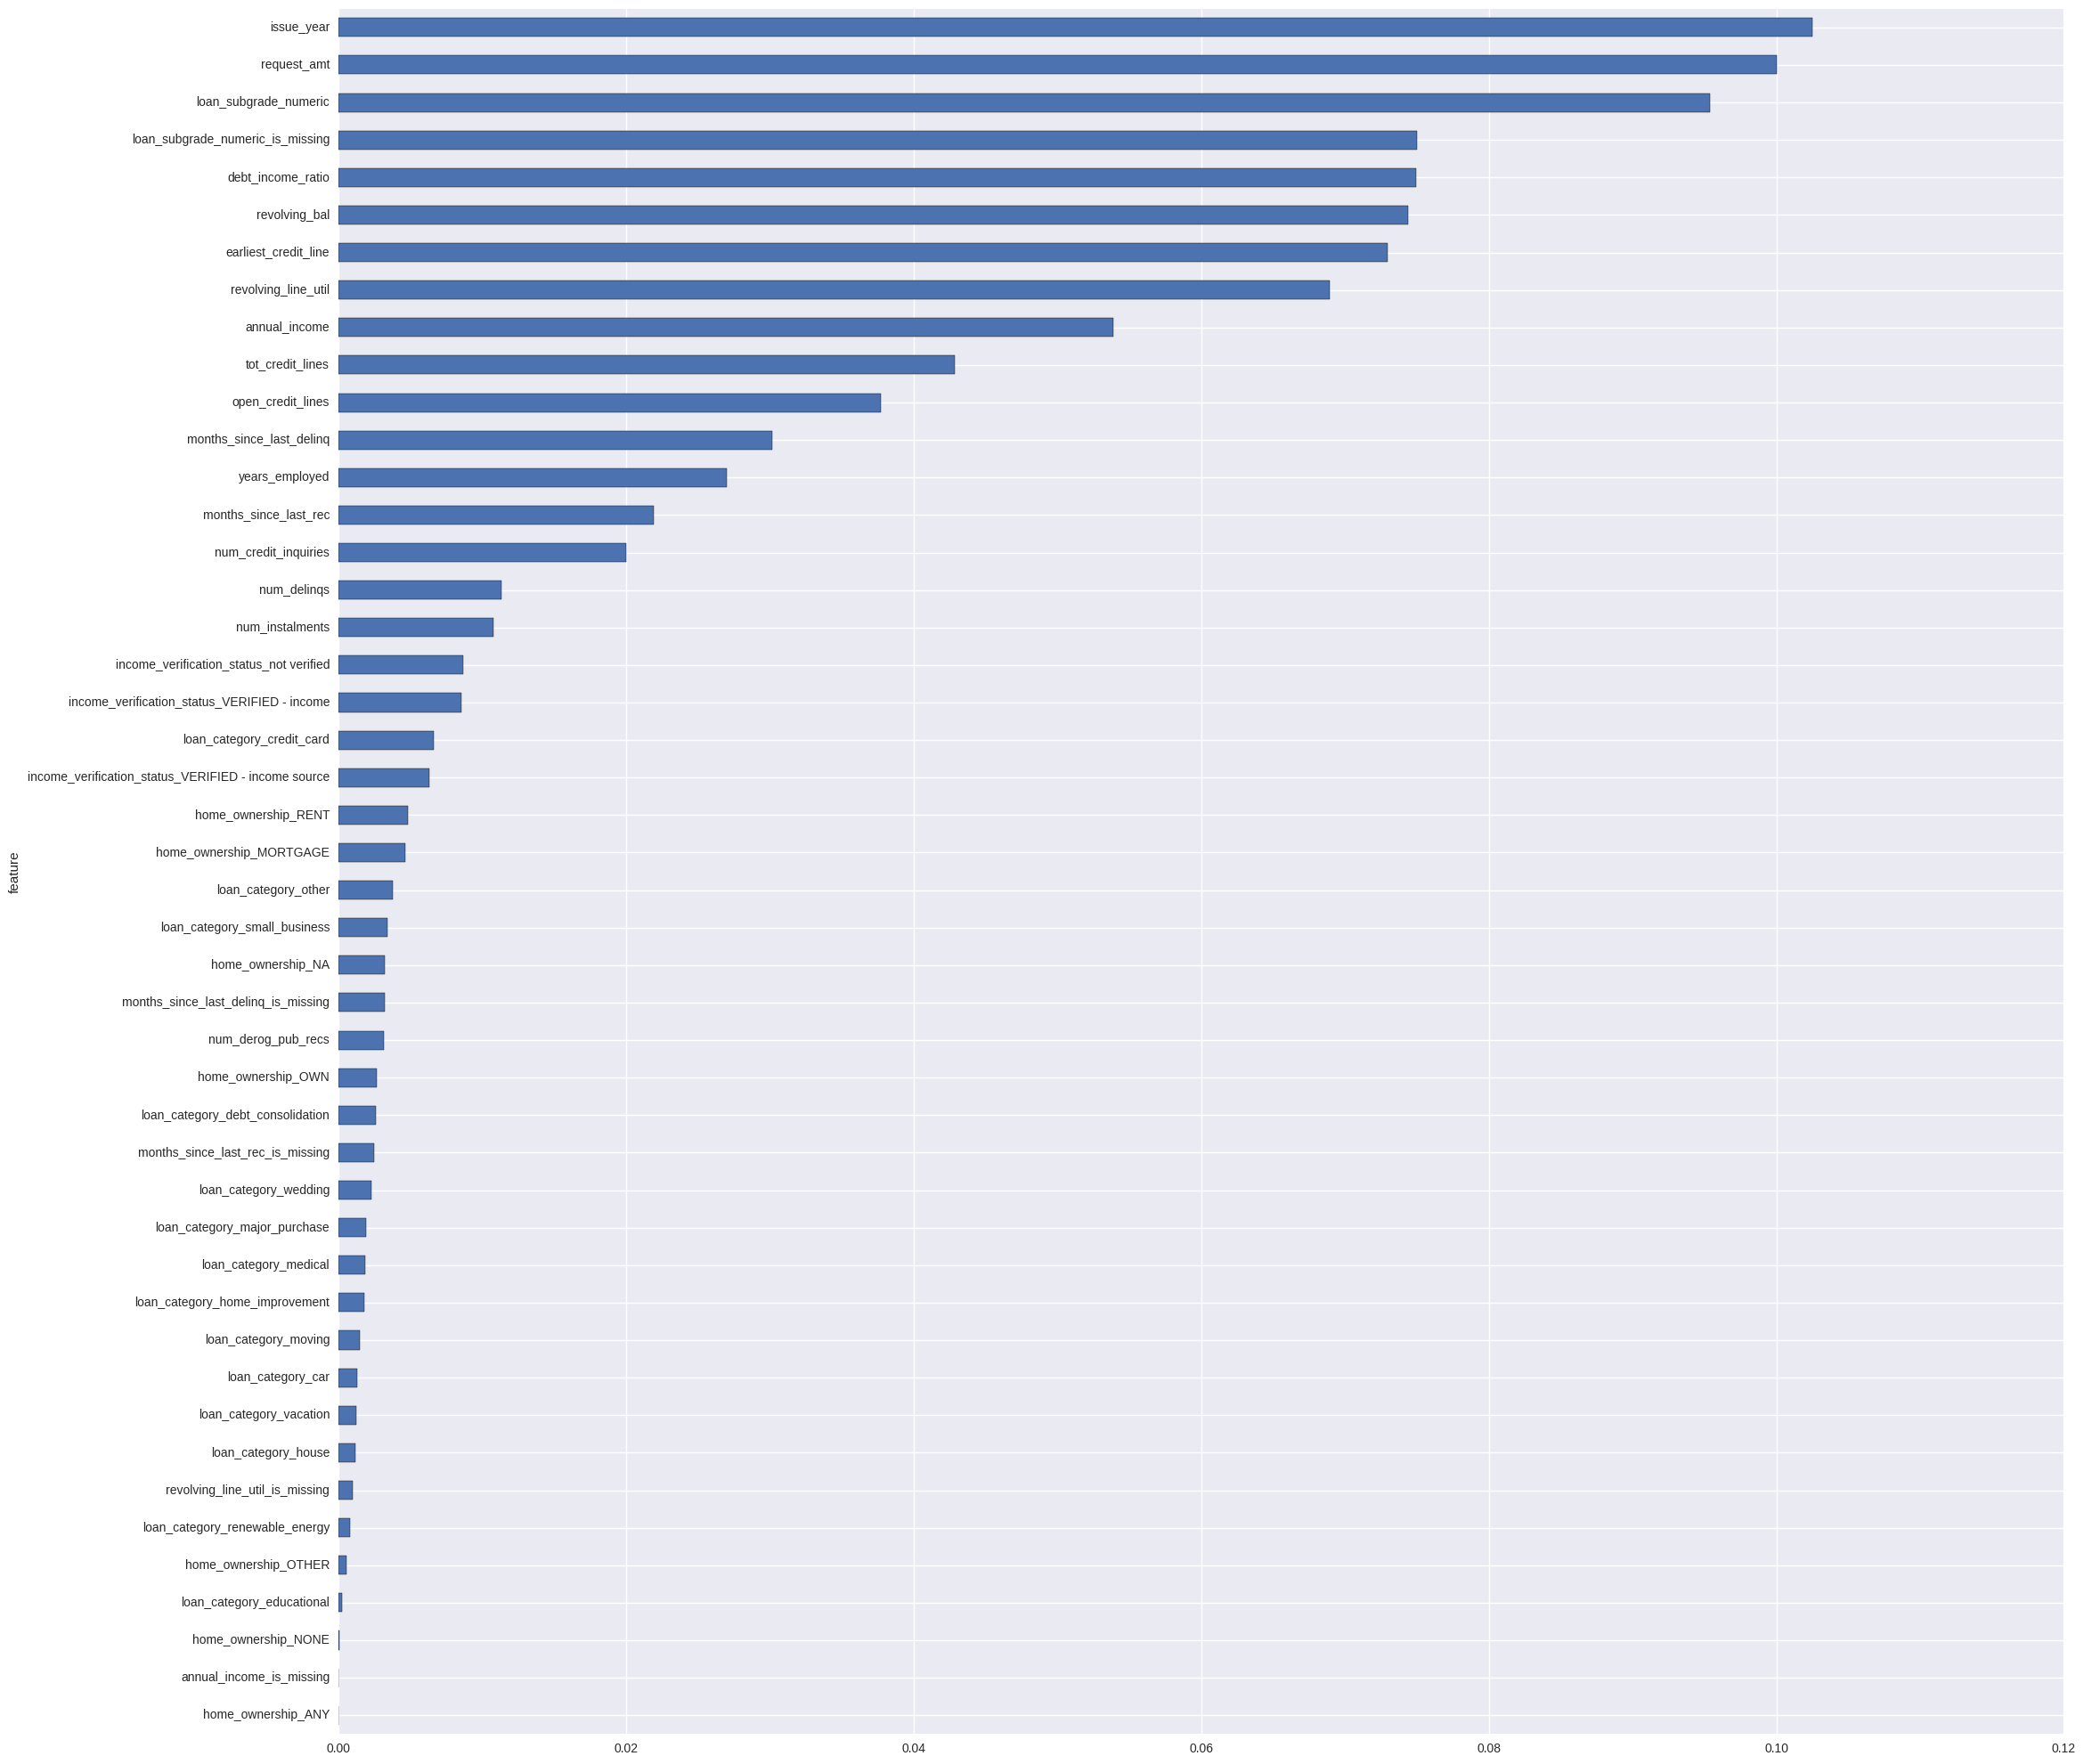

In [96]:
# sns.barplot(data=feature_importances, y='feature', x='imp_score')
sorted_feature_importances.plot(kind='barh', x='feature', y='imp_score', legend=False, figsize=(25, 25));
